# Exploratory Data Analysis (EDA): Flight Delays

We are going to analyze the provided dataset, containing up to 5.819.079 different national flights in the US in the year 2015 and their causes for delay, diversion and cancellation. The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).

## This dataset is composed by the following variables:

1. YEAR: 2015
2. MONTH: 1 (January) - 12 (December)
3. DAY: Day of month - 1 - 31
4. DAY_OF_WEEK: 1 (Monday) - 7 (Sunday)
5. AIRLINE: Unique airline code (IATA carrier code).
6. FLIGHT_NUMBER: Flight number.
7. TAIL_NUMBER: Plane tail number: aircraft registration, unique aircraft identifier.
8. ORIGIN_AIRPORT: Origin IATA airport identification code.
9. DESTINATION_AIRPORT: Destination IATA airport identification code.
10. SCHEDULED_DEPARTURE: Scheduled departure (take-off) time (local, hhmm).
11. DEPARTURE_TIME: Actual departure time (local, hhmm). Real take-off time.
12. DEPARTURE_DELAY: Departure delay, in minutes. Difference between planned and real take-off times.
13. TAXI_OUT: Departure Taxi time, in minutes. Taxiing time in take-off maneouvre.
14. WHEELS-OFF: Start of flight time in minutes.
15. SCHEDULED_TIME: Scheduled flight time in minutes.
16. ELAPSED_TIME: Real flight time in minutes.
17. AIR_TIME: Aircraft's time in the air in minutes.
18. DISTANCE: Flight distance in miles.
19. WHEELS_ON: Ending of flight time in minutes.
20. TAXI_IN: Taxiing time landing maneouvre, in minutes.
21. SCHEDULED_ARRIVAL: Scheduled arrival (landing) time (local, hhmm)
22. ARRIVAL_TIME: Actual arrival time (local, hhmm). Real landing time.
23. ARRIVAL_DELAY: Arrival delay, in minutes. Difference between planned and real take-off times. A flight is considered as "on time" if it operated less than 15 minutes later the scheduled arrival time shown in the carrier Computerized Reservations Systems (CRS). 
24. DIVERTED: Was the flight diverted? 0 = NO, 1 = YES
25. CANCELLED: Was the flight cancelled? 0 = NO, 1 = YES
26. CANCELLATION_REASON:  Reason for cancellation (A = Airline, B = Extreme Weather, C = Air System, D = Security)
27. AIR_SYSTEM_DELAY: National Airspace System (NAS) delay in minutes. Delays attributable to the  the  may include the following conditions: non-extreme weather conditions, airport operations, heavy traffic volume and air traffic control. 
28. SECURITY_DELAY: Security delay in minutes. Security delay is caused by evacuation of a terminal, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. AIRLINE_DELAY: Carrier delay in minutes. The air carrier is responsible for this delay. Different examples that cause these delays could be:  aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
30. LATE_AIRCRAFT_DELAY: Late aircraft delay in minutes. This delaystakes place on the destination airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.
31. WEATHER_DELAY: Weather delay in minutes.  Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival and prevent from flying.

In [1]:
!pip install calmap --upgrade --quiet

In [2]:
import datetime, warnings, scipy
import datetime as dt
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy import stats
import glob
import calmap
#pd.set_option('display.max_columns', 500)
#plt.style.use('seaborn-dark-palette')
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
#from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
#plt.rcParams["patch.force_edgecolor"] = True
#plt.style.use('fivethirtyeight')
#mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
#pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.0f}'.format

In [3]:
from pathlib import Path

In [4]:
data_path=Path('http://localhost:8888/tree/TFM')

In [5]:
dataset=pd.read_csv('flights.csv',low_memory=False)

In [6]:
dataset.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...           408   
1            LAX                 PBI                   10  ...           741   
2            SFO                 CLT                   20  ...           811   
3            LAX                 MIA                   20  ...           756   
4            SEA                 ANC                   25  ...           259   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0            -22         0          0                  NaN               NaN   
1             -9         0          0                  NaN               NaN   
2              5         0          0                  NaN               NaN   
3             -9         0          0                  NaN               NaN   
4            -21         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
dataset['CANCELLATION_REASON'].describe()

count     89884
unique        4
top           B
freq      48851
Name: CANCELLATION_REASON, dtype: object

In [9]:
df=dataset.drop(['TAIL_NUMBER','FLIGHT_NUMBER','WHEELS_OFF','WHEELS_ON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

In [10]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0  2015      1    1            4      AS            ANC                 SEA   
1  2015      1    1            4      AA            LAX                 PBI   
2  2015      1    1            4      US            SFO                 CLT   
3  2015      1    1            4      AA            LAX                 MIA   
4  2015      1    1            4      AS            SEA                 ANC   

   SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  ...  ELAPSED_TIME  \
0                    5            2354              -11  ...           194   
1                   10               2               -8  ...           279   
2                   20              18               -2  ...           293   
3                   20              15               -5  ...           281   
4                   25              24               -1  ...           215   

   AIR_TIME  DISTANCE  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0       169      1448        4                430           408   
1       263      2330        4                750           741   
2       266      2296       11                806           811   
3       258      2342        8                805           756   
4       199      1448        5                320           259   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  
0            -22         0          0                  NaN  
1             -9         0          0                  NaN  
2              5         0          0                  NaN  
3             -9         0          0                  NaN  
4            -21         0          0                  NaN  

[5 rows x 22 columns]

## Correlation Matrix

In [11]:
Dataset_Correlation = dataset.drop(['TAIL_NUMBER','FLIGHT_NUMBER','YEAR','MONTH','DAY','DAY_OF_WEEK'], axis=1)

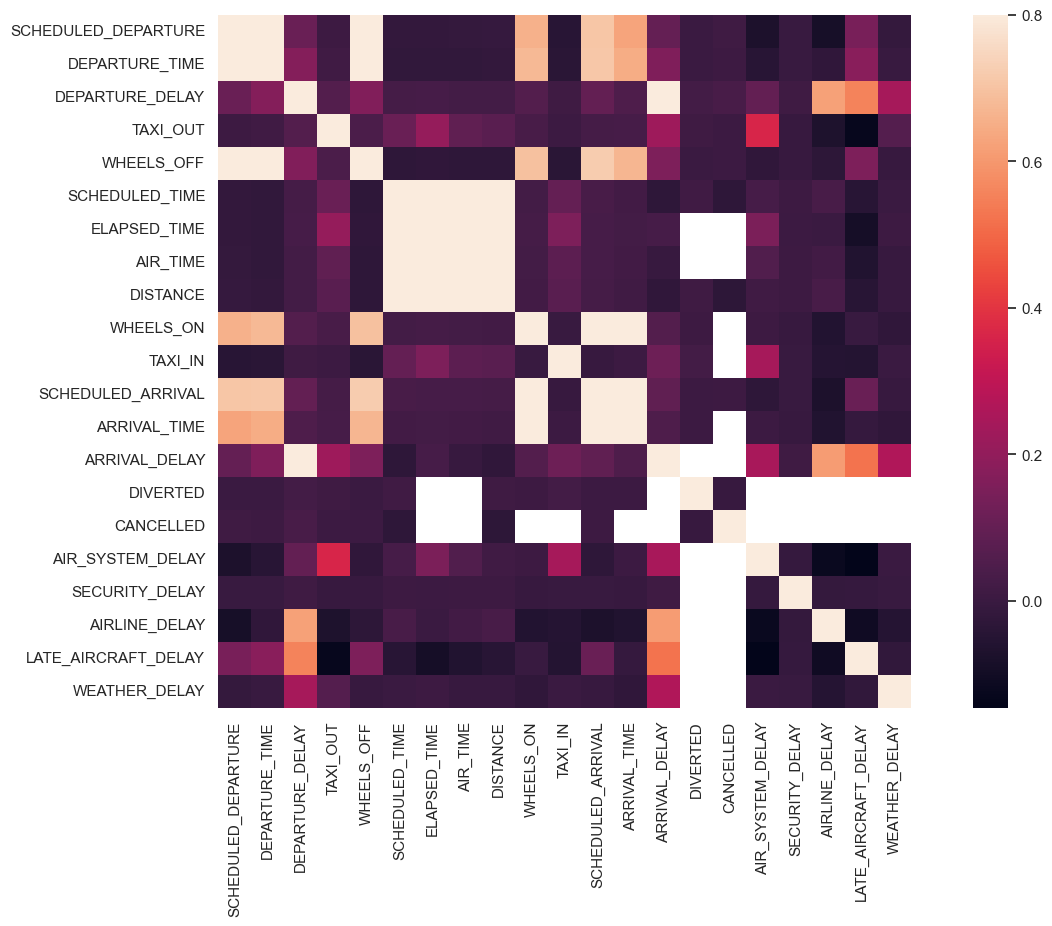

<Figure size 640x480 with 0 Axes>

In [12]:
#Correlation Matrix
corrmat = Dataset_Correlation.corr()
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
plt.savefig("Correlation Matrix.png")

Through the above correlation matrix, it can be stated that some of the dataset features present multicollinearity. This means that they can be linearly predicted from the other variables. In order to perform a better analysis and to use a more manageable dataset, some of those unwanted variables will be deleted and others will be created. The majority of variables have a low correlation with the Arrival Delay. However, Departure Delay has a high correlation with Arrival Delay. Even though, highly correlated features should be removed, it is important to predict Arrival Delays, knowing that the flight was delayed in departure and the magnitude of the delay.

To start the analysis, some observations can be stated:

1. The reason of what caused a delay is only available when the Arrival Delay is longer than 15 minutes. Arrival Delay is the sum of Airline Delay, Weather Delay, Air System Delay and Late Aircraft Delay. If the individual flight, there's no data related to what caused that circumstance.
2. It is commonly observed that the Elapsed Time is higher than the sum of the time spent in the following stages: Arrival Taxi, Departure Taxi and Air Time (Actual Elapsed Time). This is the reason behind the fact that when flight's departure is on time, flights landing occurs previously to the scheduled time. It also permits to absorb delay on chained flights.

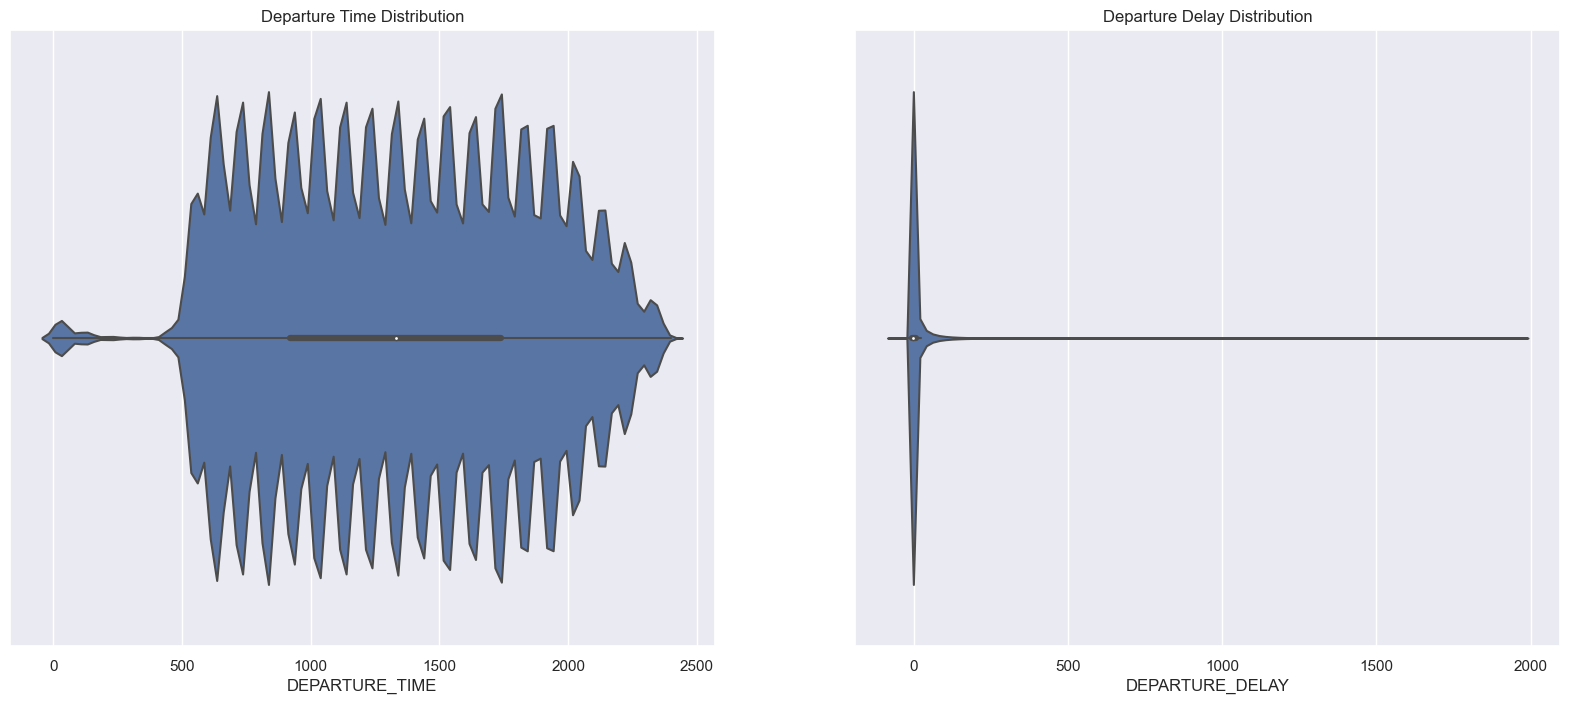

In [13]:
sns.set_style('darkgrid')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.violinplot(data=df, x='DEPARTURE_TIME', ax=ax[0])
ax[0].set_title('Departure Time Distribution')
sns.violinplot(data=df, x='DEPARTURE_DELAY', ax=ax[1])
ax[1].set_title('Departure Delay Distribution')
plt.close(2)
plt.show()

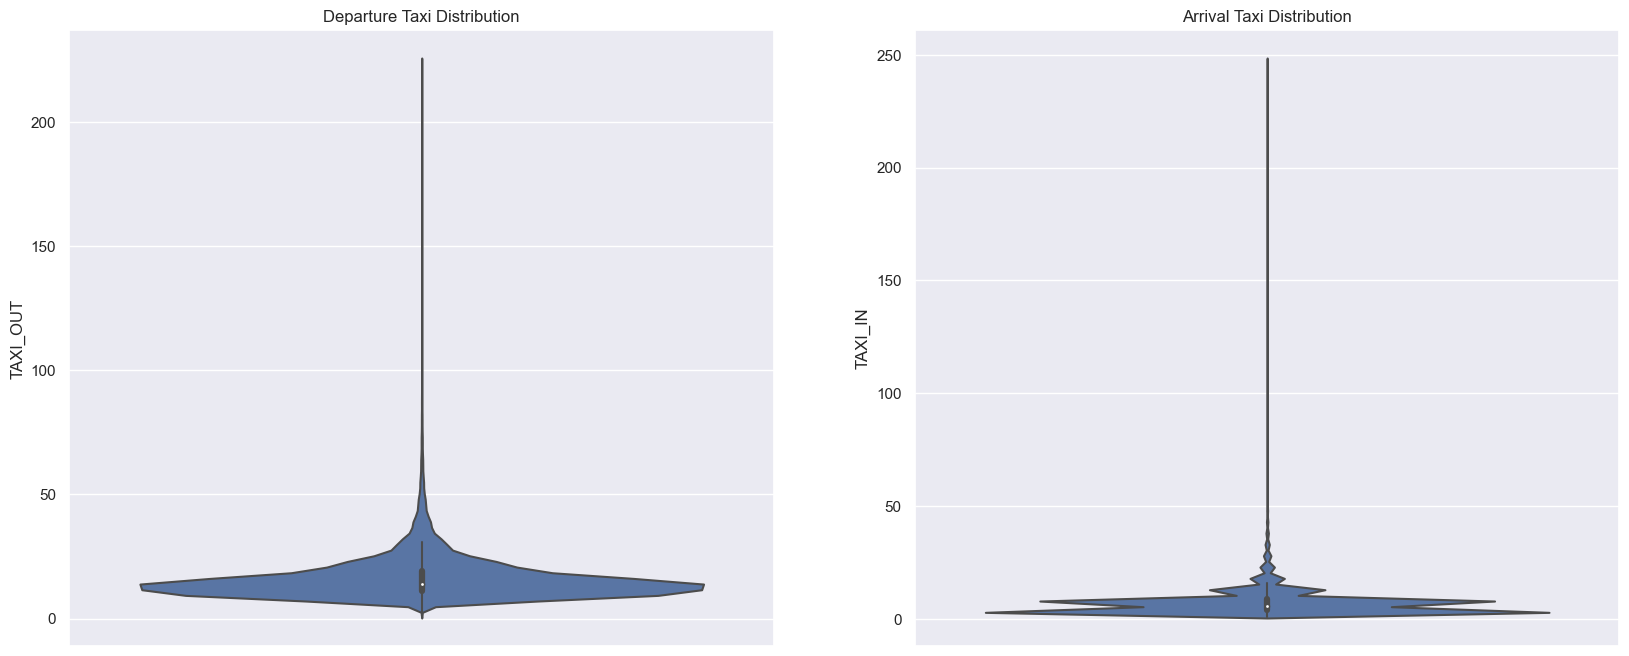

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.violinplot(data=df, y='TAXI_OUT', orient='v', ax=ax[0])
ax[0].set_title('Departure Taxi Distribution')
sns.violinplot(data=df, y='TAXI_IN', orient='v', ax=ax[1])
ax[1].set_title('Arrival Taxi Distribution')
plt.close(2)
plt.show()

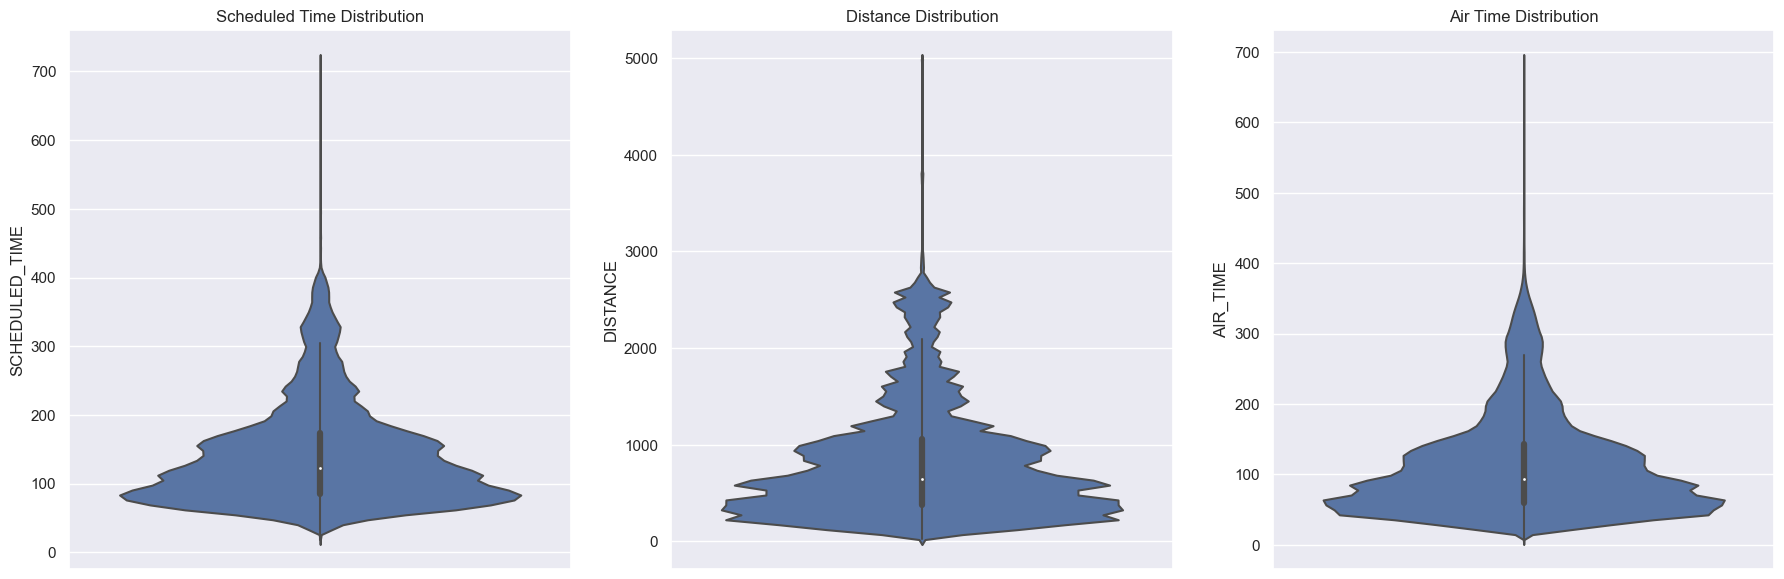

In [15]:
f,ax=plt.subplots(1,3,figsize=(22,7))
sns.violinplot(data=df, y='SCHEDULED_TIME', ax=ax[0])
ax[0].set_title('Scheduled Time Distribution')
sns.violinplot(data=df, y='DISTANCE', ax=ax[1])
ax[1].set_title('Distance Distribution')
sns.violinplot(data=df, y='AIR_TIME', ax=ax[2])
ax[2].set_title('Air Time Distribution')
plt.close(3)
plt.show()

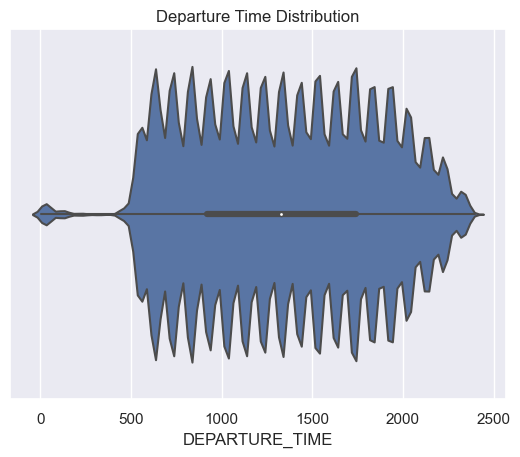

<Figure size 640x480 with 0 Axes>

In [16]:
sns.set()
ax=sns.violinplot(data=df, x='DEPARTURE_TIME')
ax.set_title('Departure Time Distribution')
plt.show()
plt.savefig("Departure Time Distribution.png")

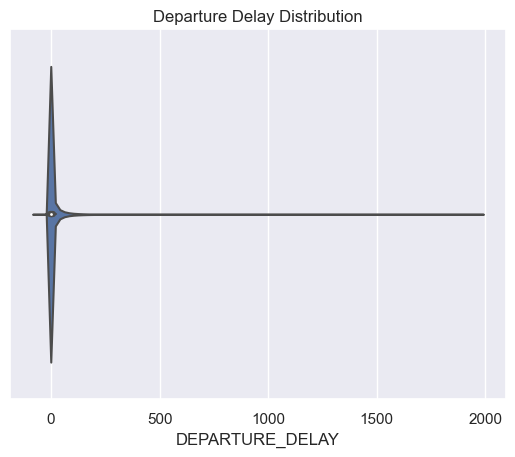

<Figure size 640x480 with 0 Axes>

In [17]:
sns.set()
ax=sns.violinplot(data=df, x='DEPARTURE_DELAY')
ax.set_title('Departure Delay Distribution')
plt.show()
plt.savefig("Departure Delay Distribution (Violin Plot).png")

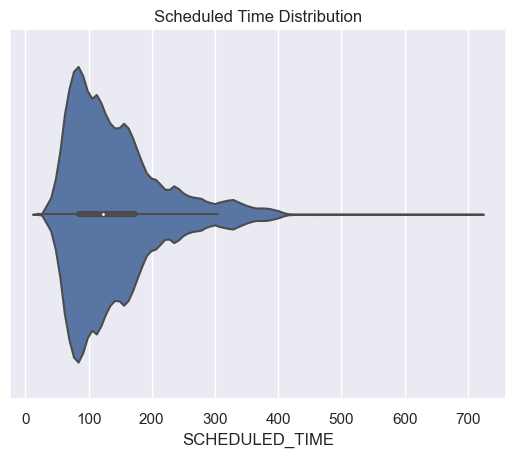

<Figure size 640x480 with 0 Axes>

In [18]:
sns.set()
ax=sns.violinplot(data=df, x='SCHEDULED_TIME')
ax.set_title('Scheduled Time Distribution')
plt.show()
plt.savefig("Scheduled Time Distribution (Violin Plot).png")

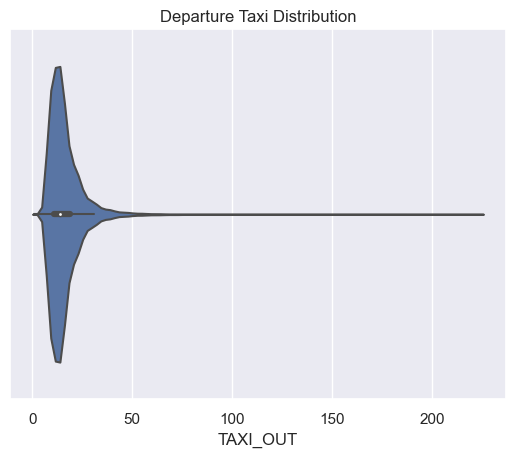

<Figure size 640x480 with 0 Axes>

In [19]:
sns.set()
ax=sns.violinplot(data=df, x='TAXI_OUT')
ax.set_title('Departure Taxi Distribution')
plt.show()
plt.savefig("Departure Taxi Distribution (Violin Plot).png")

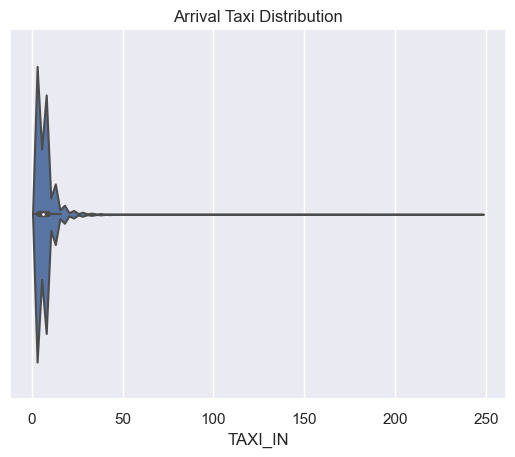

<Figure size 640x480 with 0 Axes>

In [20]:
sns.set()
ax=sns.violinplot(data=df, x='TAXI_IN')
ax.set_title('Arrival Taxi Distribution')
plt.show()
plt.savefig("Arrival Taxi Distribution (Violin Plot).png")

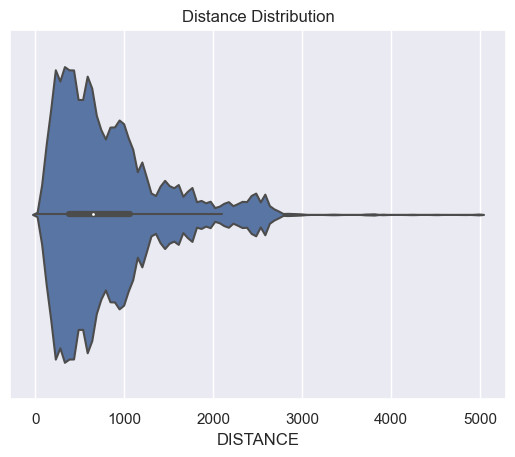

<Figure size 640x480 with 0 Axes>

In [21]:
sns.set()
ax=sns.violinplot(data=df, x='DISTANCE')
ax.set_title('Distance Distribution')
plt.show()
plt.savefig("Distance Distribution (Violin Plot).png")

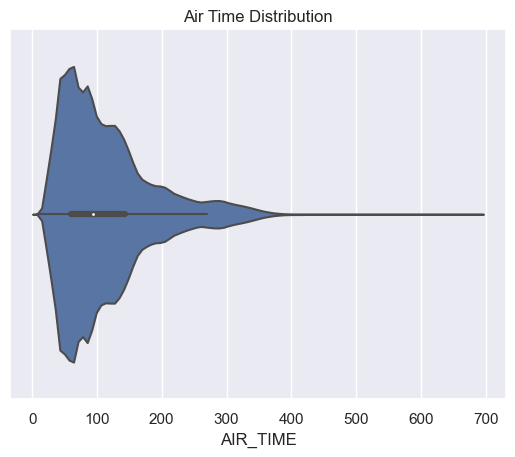

<Figure size 640x480 with 0 Axes>

In [22]:
sns.set()
ax=sns.violinplot(data=df, x='AIR_TIME')
ax.set_title('Air Time Distribution')
plt.show()
plt.savefig("Air Time Distribution (Violin Plot).png")

Scheduled Time Distribution is highly skewed with a great right tail. This variable must be transformed before building a model. Departure Delay, Departure Taxi, Arrival Taxi, Scheduled Time, Distance and Air Time are also highly right-tailed and will also need a transformation.

From the Departure Time Distribution, it can be stated the fact that departing flights are highly concentrated between 5 o'clock in the morning and 9 o'clock in the night.

The Violin plots show that Distance and Scheduled Time have a very similar distribution. Also, Air Time has a related distribution from the two previous features. 

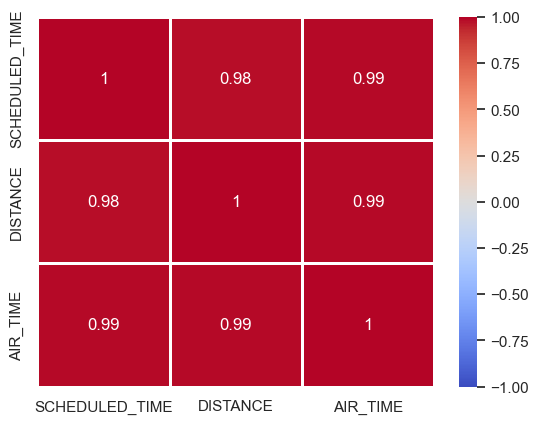

<Figure size 640x480 with 0 Axes>

In [23]:
sns.set()
corr = df[['SCHEDULED_TIME','DISTANCE','AIR_TIME']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1,lw=1)
plt.show()
plt.savefig("Heat Map (Scheduled Time, Distance and Air Time).png")

This heatmap graph is the confirmation that Scheduled Time, Distance and Air Time are highly correlated, with a correlation of 0.98 (between Scheduled Time and Distance) and 0.99 (between Air Time and Distance). This correlation relates to the fact that great distances imply more Scheduled Time and more Air Time and shorter distances to take less Scheduled time and Air Time. Only one of these variables will be used for the model creation and the other two will be dropped.

## Bivariate Analysis

In [24]:
df_Bivariate=dataset.drop(['TAIL_NUMBER','FLIGHT_NUMBER','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','WHEELS_OFF','WHEELS_ON','CANCELLED','DIVERTED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

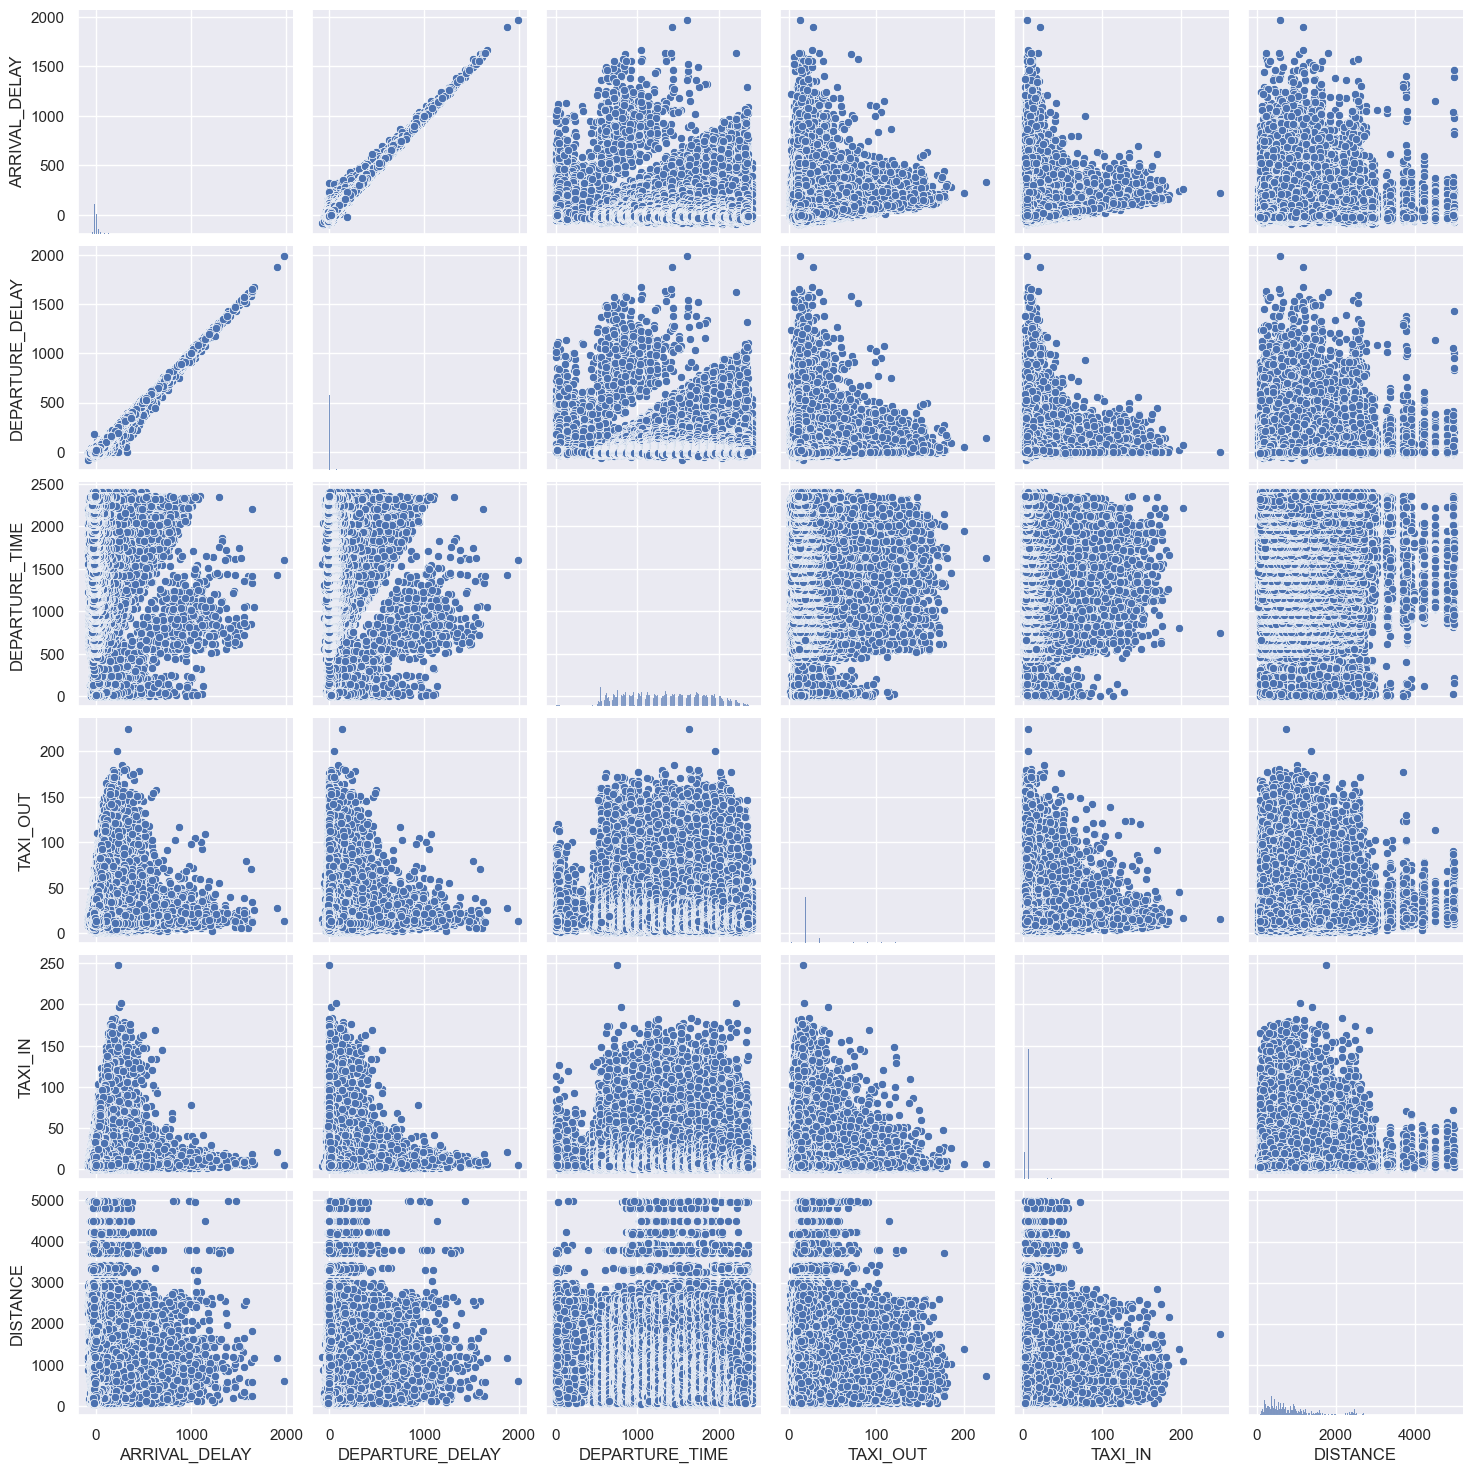

<Figure size 640x480 with 0 Axes>

In [25]:
sns.set()
cols = ['ARRIVAL_DELAY','DEPARTURE_DELAY','DEPARTURE_TIME','TAXI_OUT','TAXI_IN','DISTANCE']
sns.pairplot(df_Bivariate[cols], size = 2.5)
plt.show()
plt.savefig("Bivariate Analysis.png")

In [26]:
# Creating and naming a new variable
df['DEPARTURE_DATE'] = pd.to_datetime(df.YEAR*10000+df.MONTH*100+df.DAY,format='%Y%m%d')

# Drop the not needed features
df = df.drop("YEAR",1) # Converted to date
df = df.drop("DAY",1) # Converted to date

## Flight Delay Categories
Flight Delays can be divided into three categories:
- On Time or Small Delay (up to 15 minutes delay). Generally, this delays are considered not accountable.
- Medium Delay (between 15 and 45 minutes delay).
- Large Delay (more than 45 minutes delay).

In [27]:
df['DELAY_CATEGORY'] = None
df.loc[df['ARRIVAL_DELAY'] <= 0, 'DELAY_CATEGORY'] = 'OnTime_Early'
df.loc[(df['ARRIVAL_DELAY'] > 0) & (df['ARRIVAL_DELAY'] <= 15), 'DELAY_CATEGORY'] = 'Small_Delay'
df.loc[(df['ARRIVAL_DELAY'] > 15) & (df['ARRIVAL_DELAY'] <= 45), 'DELAY_CATEGORY'] = 'Medium_Delay'
df.loc[df['ARRIVAL_DELAY'] > 45, 'DELAY_CATEGORY'] = 'Large_Delay'
df.loc[df['DIVERTED'] == 1, 'DELAY_CATEGORY'] = 'Diverted'
df.loc[df['CANCELLED'] == 1, 'DELAY_CATEGORY'] = 'Cancelled'

In [28]:
df.head()

MONTH  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0      1            4      AS            ANC                 SEA   
1      1            4      AA            LAX                 PBI   
2      1            4      US            SFO                 CLT   
3      1            4      AA            LAX                 MIA   
4      1            4      AS            SEA                 ANC   

   SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  \
0                    5            2354              -11        21   
1                   10               2               -8        12   
2                   20              18               -2        16   
3                   20              15               -5        15   
4                   25              24               -1        11   

   SCHEDULED_TIME  ...  DISTANCE  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0             205  ...      1448        4                430           408   
1             280  ...      2330        4                750           741   
2             286  ...      2296       11                806           811   
3             285  ...      2342        8                805           756   
4             235  ...      1448        5                320           259   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  DEPARTURE_DATE  \
0            -22         0          0                  NaN      2015-01-01   
1             -9         0          0                  NaN      2015-01-01   
2              5         0          0                  NaN      2015-01-01   
3             -9         0          0                  NaN      2015-01-01   
4            -21         0          0                  NaN      2015-01-01   

  DELAY_CATEGORY  
0   OnTime_Early  
1   OnTime_Early  
2    Small_Delay  
3   OnTime_Early  
4   OnTime_Early  

[5 rows x 22 columns]

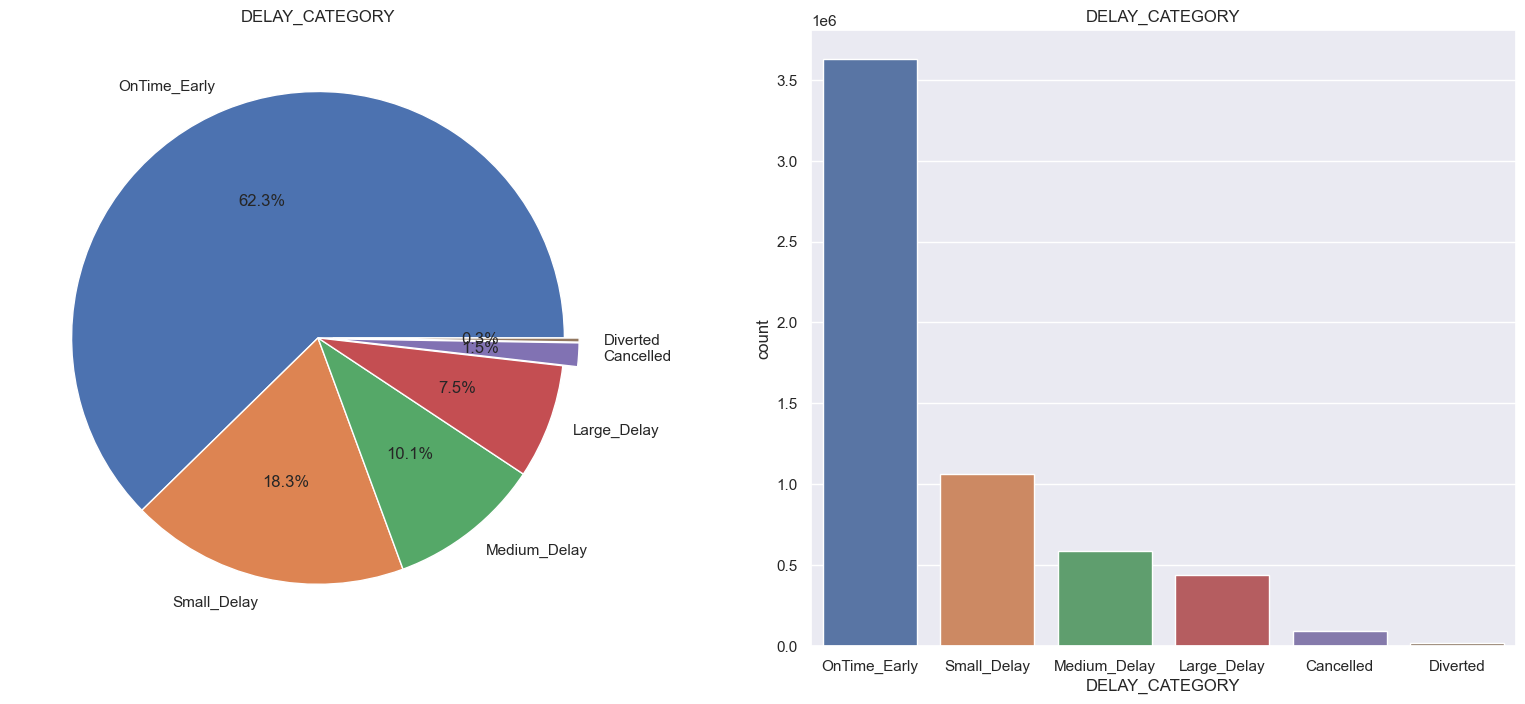

DELAY_CATEGORY represents wether the flight was On Time or Early (OnTime_Early), delayed up to 15 minutes (Small_Delay), delayed up to 45 minutes (Medium_Delay), delayed more than 45 minutes (Large_Delay), diverted (Diverted) or cancelled (Cancelled)


<Figure size 640x480 with 0 Axes>

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['DELAY_CATEGORY'].value_counts().plot.pie(explode=[0,0,0,0,0.06,0.06],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('DELAY_CATEGORY')
ax[0].set_ylabel('')
sns.countplot(data=df,x = 'DELAY_CATEGORY',order = df['DELAY_CATEGORY'].value_counts().index,ax=ax[1])
ax[1].set_title('DELAY_CATEGORY')
plt.show()
plt.savefig("Delay Category.png")

print('DELAY_CATEGORY represents wether the flight was On Time or Early (OnTime_Early), delayed up to 15 minutes (Small_Delay), delayed up to 45 minutes (Medium_Delay), delayed more than 45 minutes (Large_Delay), diverted (Diverted) or cancelled (Cancelled)')

In 2015, 62,3% of domestic flights in the US arrived on-time or early considering the scheduled arrival time. 18,3% of them were delayed, but less than 15 minutes. 10.1% of the US commercial flights arrived between 15 and 45 minutes late. Finally, 7.5% of the flights had delays of more than 45 minutes. From another point of view and stablishing other interpretation, 90,7% of dataset flights have a delay of less than 45 minutes. It is important to point out the fact that the majority of flights arrived before the Scheduled Arrival time.

On the other hand, just a 1,5% of the flights were cancelled and 0,3% were diverted.

In [30]:
df_CategoryMonth = df.groupby('MONTH')['DELAY_CATEGORY'].value_counts(normalize=True).unstack() * 100 # Group by month and unstacking the delay group
Column_Order = ['OnTime_Early','Small_Delay','Medium_Delay','Large_Delay','Diverted','Cancelled'] # Columns.
df_CategoryMonth[Column_Order].style.background_gradient(cmap='Blues')

The lower percentage of flights that arrived early or on-time took place in June. On this month, the percentage of flights that were cancelled or diverted is greater than previous and subsequent months. Also, June is the month with a higher percentage of flights with a large Arrival Delay (more than 45 minutes).

In February, it is collected the biggest percentage of cancelled flights (4,78% of all February flights). This month also registers a high percentage of flights with a small delay (up to 15 minutes of delay):

The best numbers in terms of flights that arrived early or on-time are presented after the Summer months (September, October and November), with a percentage of the number of flights of 70,7%, 70,27% and 66,87%, respectively.

## Cancellation Reason
There are a series of reasons, responsible for a flight cancellation, that are refered in the dataset by the following codes:
- Airline or Carrier: A
- Extreme Weather: B
- National Airspace System (NAS): C
- Security: D

In [31]:
df.loc[df["CANCELLATION_REASON"] =="A", 'CANCELLATION_REASON'] = "Airline"
df.loc[df["CANCELLATION_REASON"] =="B", 'CANCELLATION_REASON'] = "Weather"
df.loc[df["CANCELLATION_REASON"] =="C", 'CANCELLATION_REASON'] = "Air System"
df.loc[df["CANCELLATION_REASON"] =="D", 'CANCELLATION_REASON'] = "Security"

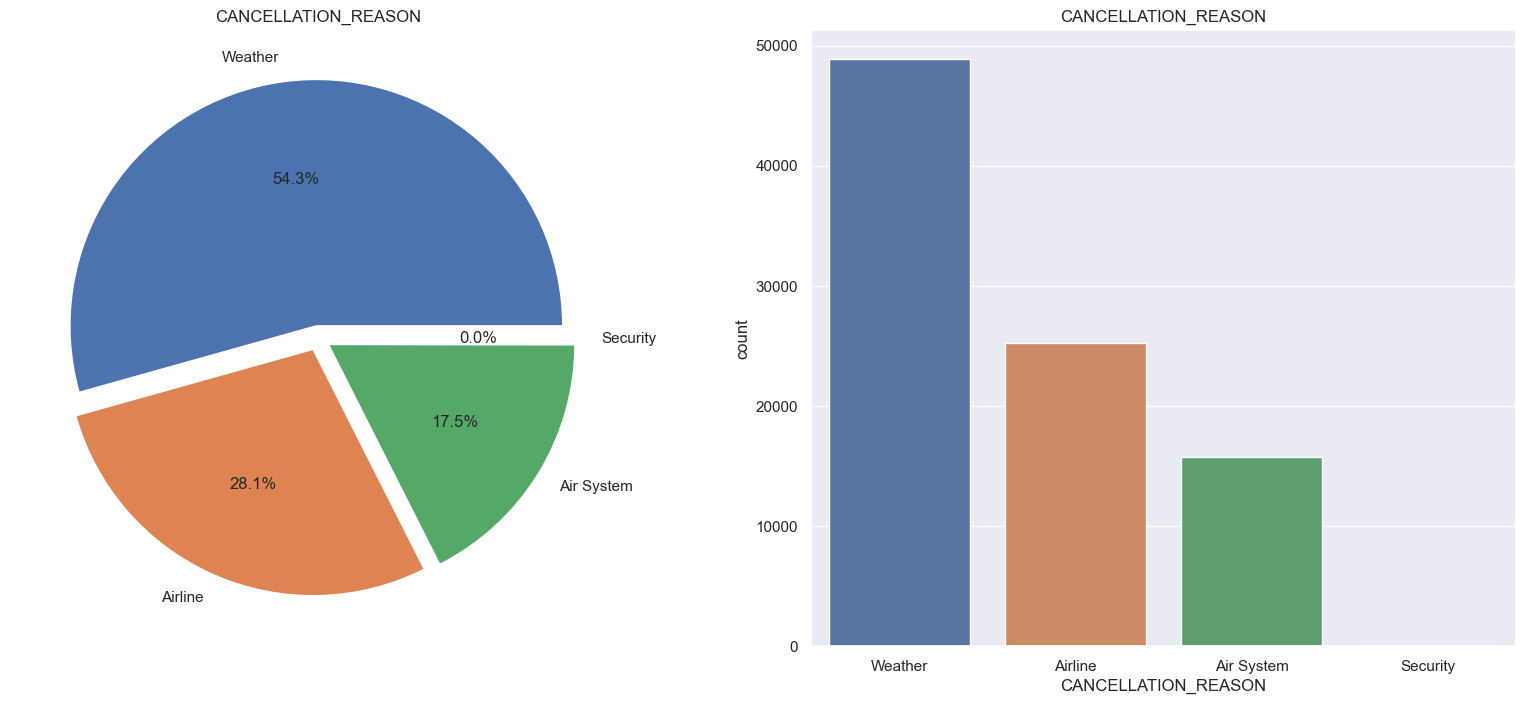

<Figure size 640x480 with 0 Axes>

In [32]:
CancFlights = df[(df.DELAY_CATEGORY == 'Cancelled')]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CANCELLATION_REASON'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('CANCELLATION_REASON')
ax[0].set_ylabel('')
sns.countplot(data=CancFlights,x = 'CANCELLATION_REASON',order = CancFlights['CANCELLATION_REASON'].value_counts().index, ax=ax[1])
ax[1].set_title('CANCELLATION_REASON')
plt.show()
plt.savefig("Cancellation Reason.png")

From the previous graphs, representing the different reasons for cancellations, it can be extracted that Extreme Weather is the main reason behind more than half of the flights cancelled (54.3% of cancelled flights were due to the weather). Airlines and the National Airspace System (NAS) are responsible for 28,1% and 17,5% respectively of the US domestic cancelled flights. Security isn't the cause for any of the flights that were cancelled.

In [33]:
df_CancellationReasonMonth = df.groupby('MONTH')['CANCELLATION_REASON'].value_counts(normalize=True).unstack() * 100 # Group by month and unstacking the Cancellation Reason.
Column_Order = ['Weather','Airline','Air System','Security'] # Columns.
df_CancellationReasonMonth[Column_Order].style.background_gradient(cmap='Blues')

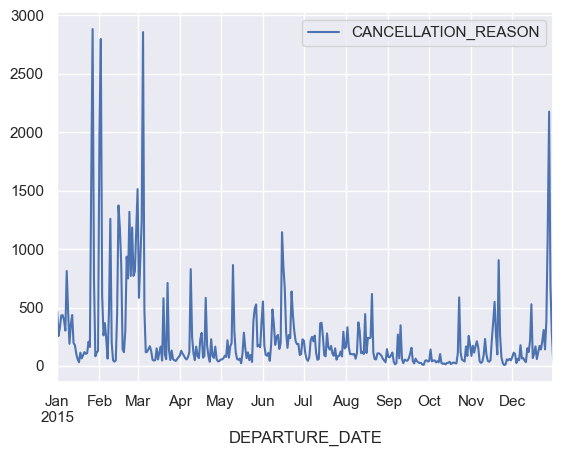

<Figure size 640x480 with 0 Axes>

In [34]:
CancFlights[['DEPARTURE_DATE','CANCELLATION_REASON']].groupby(['DEPARTURE_DATE']).count().plot()
#plt.legend('')
plt.show()
plt.savefig("Cancelled Flights per Departure Date.png")

During 2015, cancellations were concentrated during the first months of the year, as we can observe the peaks in the final days of January, February and the first days of March. The reason for this cancellations was an extreme weather event, 'The February 2015 North American Cold Wave', that mainly affected the eastern half of the United States. The cause of this event was due to the polar vortex advancing in the south direction into the east coast and even affrcting the Southeast. The cold wave lasted until the start of March. Extreme weather was also the reason behind all the December cancellations that affected the return home from Christmas holidays. 

<Figure size 640x480 with 0 Axes>

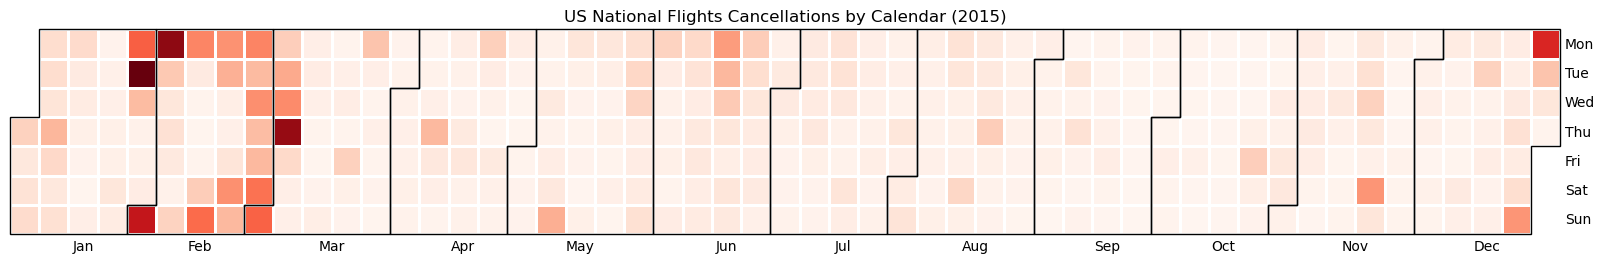

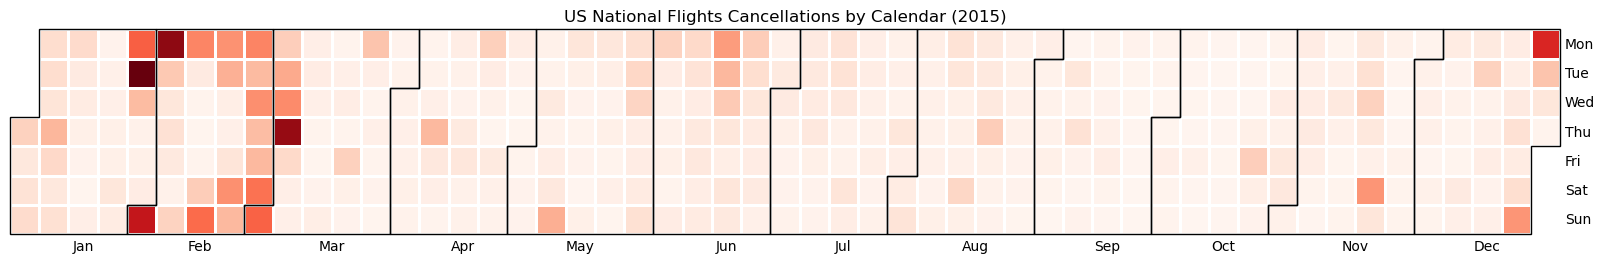

In [100]:
Cancellation_Incidents = df.groupby('DEPARTURE_DATE')['CANCELLED'].mean()
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('US National Flights Cancellations by Calendar (2015)')
calmap.yearplot(Cancellation_Incidents, year=2015, monthly_border=True)
plt.savefig("US National Flights Cancellations by Calendar (2015).png")
plt.show()

## Flight Delays

In [36]:
FlightDelays = df[(df.ARRIVAL_DELAY > 0)]

In [37]:
FlightDelays.head()

MONTH  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
2       1            4      US            SFO                 CLT   
5       1            4      DL            SFO                 MSP   
14      1            4      DL            SEA                 MSP   
20      1            4      NK            LAS                 MCI   
21      1            4      AA            SEA                 MIA   

    SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  \
2                    20              18               -2        16   
5                    25              20               -5        18   
14                   40              39               -1        28   
20                   55             120               25        11   
21                  100              52               -8        30   

    SCHEDULED_TIME  ...  DISTANCE  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
2              286  ...      2296       11                806           811   
5              217  ...      1589        6                602           610   
14             189  ...      1399        4                549           557   
20             162  ...      1139        4                537           543   
21             338  ...      2724        6                938           939   

    ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  DEPARTURE_DATE  \
2               5         0          0                  NaN      2015-01-01   
5               8         0          0                  NaN      2015-01-01   
14              8         0          0                  NaN      2015-01-01   
20              6         0          0                  NaN      2015-01-01   
21              1         0          0                  NaN      2015-01-01   

   DELAY_CATEGORY  
2     Small_Delay  
5     Small_Delay  
14    Small_Delay  
20    Small_Delay  
21    Small_Delay  

[5 rows x 22 columns]

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(FlightDelays['ARRIVAL_DELAY'], ax=ax[0])
ax[0].set_title('Arrival Delay (Univariate Distribution Plot)')
FlightDelays.query('(ARRIVAL_DELAY > 0) and (ARRIVAL_DELAY <= 121 )')['ARRIVAL_DELAY'].plot(kind='hist', bins=60, ax=ax[1])
plt.xlabel("Arrival Delay (Minutes)", size = 12,)
ax[1].set_title('Arrival Delay Distribution')
plt.close(2)
plt.show()

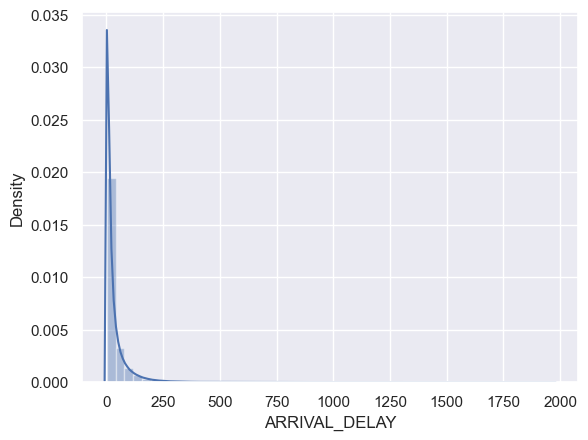

<Figure size 640x480 with 0 Axes>

In [39]:
# Histogram
sns.distplot(FlightDelays['ARRIVAL_DELAY'])
plt.show()
plt.savefig("Arrival Delay (Univariate Distribution Plot).png")

In [40]:
# Skewness and Kurtosis of the graph
print("Skewness: %f" % FlightDelays['ARRIVAL_DELAY'].skew())
print("Kurtosis: %f" % FlightDelays['ARRIVAL_DELAY'].kurt())

Skewness: 5.580810
Kurtosis: 66.498762


As it can be observed from the histogram and taking into account the skewness and kurtosis metrics,  delays are mostly located on the left side of the graph, being the majority of delays short in time. The Skewness value of 5,58 indicates that there is a greater number of smaller values for Arrival Delay. On the other hand, the Kurtosis great positive value (66,5) stipulates a very peaked distribution, as there is a density peak for low values of Arrival Delay.

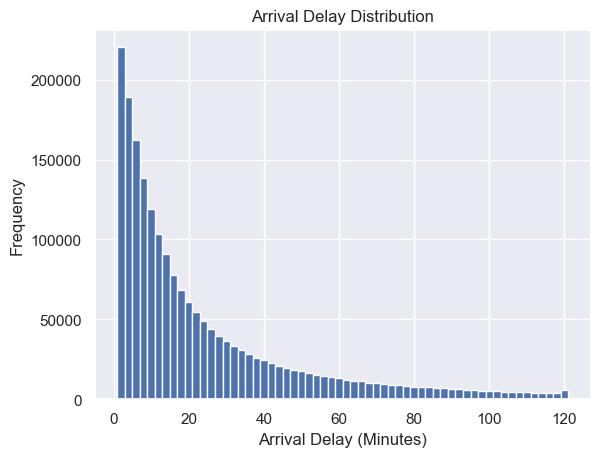

In [41]:
FlightDelays.query('(ARRIVAL_DELAY > 0) and (ARRIVAL_DELAY <= 121 )')['ARRIVAL_DELAY'].plot(kind='hist', bins=60,
                                                                                     title='Arrival Delay Distribution')
plt.xlabel("Arrival Delay (Minutes)", size = 12,)
plt.savefig("Arrival Delay Distribution.png")

The above graph shows the frequency of the flight's Arrival Delay in minutes (from 1 minute to 120 minutes of delay). It can be concluded that most of flight delays are short in time. The decrease in the number of flights when the time of Arrival Delay increases can be mathematically resembled to an exponential decay.

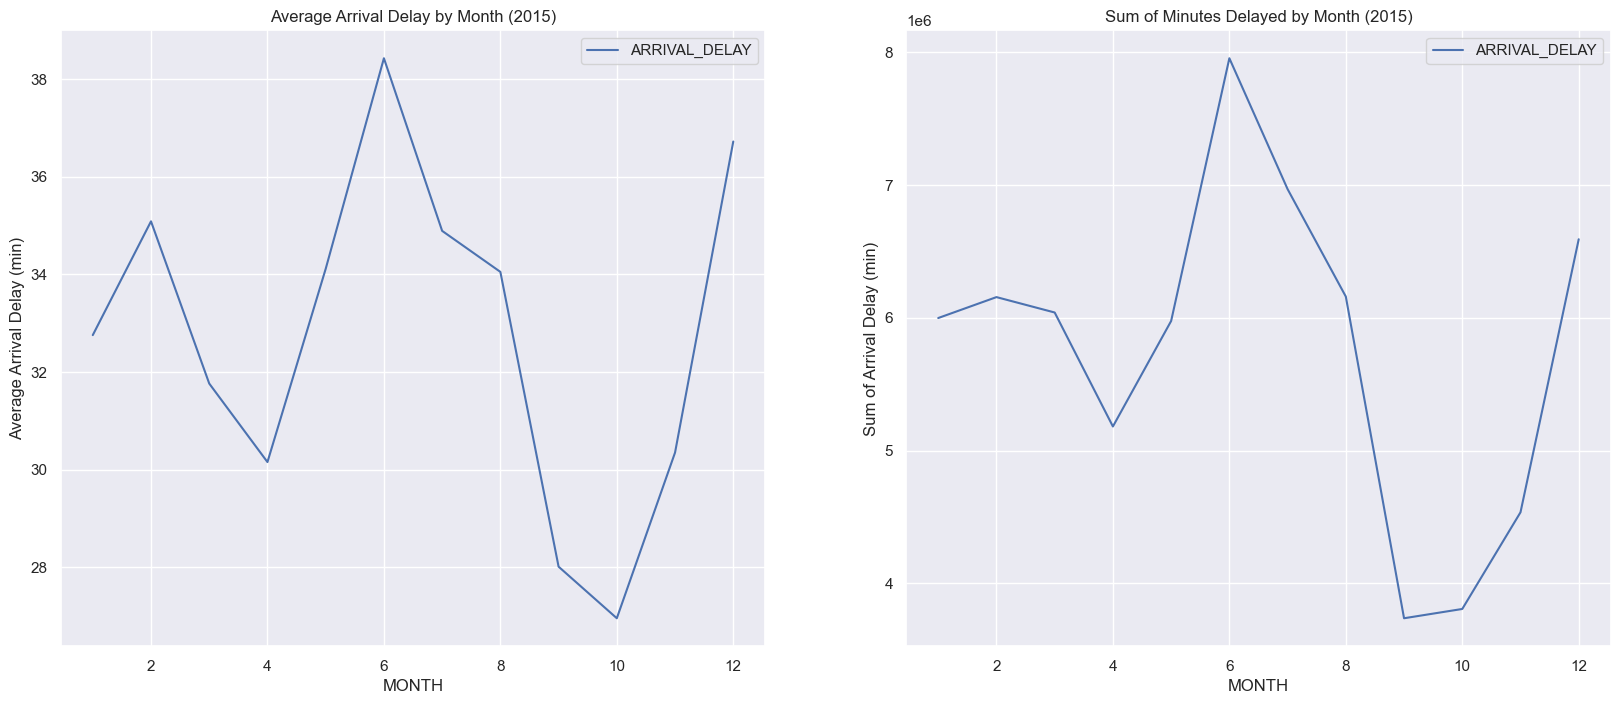

<Figure size 640x480 with 0 Axes>

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
FlightDelays[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average Arrival Delay by Month (2015)')
ax[0].set_ylabel('Average Arrival Delay (min)')
FlightDelays[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1])
ax[1].set_title('Sum of Minutes Delayed by Month (2015)')
ax[1].set_ylabel('Sum of Arrival Delay (min)')
plt.show()
plt.savefig("Average Arrival Delay by Month ; Sum of Minutes Delayed by Month.png")

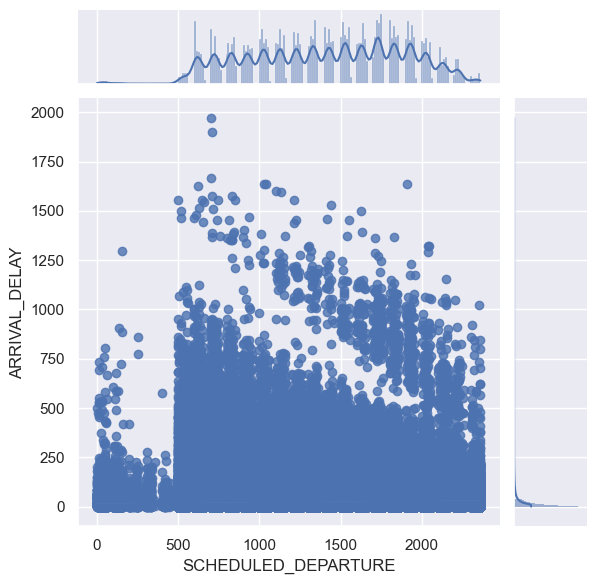

<Figure size 640x480 with 0 Axes>

In [43]:
sns.jointplot(x='SCHEDULED_DEPARTURE',y='ARRIVAL_DELAY',data=FlightDelays,kind='reg',color='b',fit_reg = True)
plt.show()
plt.savefig("Scheduled Departure vs Arrival Delay (Joint Plot).png")

Based on the average Arrival Delay results, flight delays focused specially on February, June and December. There are also peaks on average delays on July and August.

Taking into account the different day hours when the flight departure was scheduled it can be seen in the top section of the scatterplot how the delays have peaks and are concentrated on the o'clock hours. It can be observed from the scatterplot the fact that starting from 5 in the morning and spreading throughout the different upcoming hours of the day, the delays are splitted into two groups (longer and shorter delays). A conclusion that can be extracted from this fact is that the delays that were created in previous flights (chained flights), increased or decreased in following day flights.

In [44]:
df_Delay=dataset.drop(['YEAR','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','DISTANCE','SCHEDULED_ARRIVAL','ARRIVAL_TIME','TAIL_NUMBER','FLIGHT_NUMBER','WHEELS_OFF','WHEELS_ON','CANCELLATION_REASON','DIVERTED','CANCELLED'], axis=1)

In [45]:
df_DelayData = df_Delay[(df_Delay.ARRIVAL_DELAY > 15)]

In [46]:
df_DelayData.head()

MONTH  TAXI_OUT  ELAPSED_TIME  AIR_TIME  TAXI_IN  ARRIVAL_DELAY  \
27      1        14           220       166       40             25   
30      1         9           175       156       10             43   
50      1        25           196       160       11             20   
52      1         9           175       163        3             85   
55      1        15           258       237        6             89   

    AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27                25               0              0                    0   
30                43               0              0                    0   
50                20               0              0                    0   
52                 0               0             85                    0   
55                17               0             72                    0   

    WEATHER_DELAY  
27              0  
30              0  
50              0  
52              0  
55              0

In [47]:
df_DelayReason = df_DelayData.filter(['MONTH','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)
df_DelayReason = df_DelayReason.groupby('MONTH')['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'].sum().plot()
df_DelayReason.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()
plt.savefig("Delay Reason per Month.png")

<Figure size 640x480 with 0 Axes>

Based on the previous graph, it can be concluded that there are three main reasons that cause most of the flight delays during 2015: Late Aircraft, Airline or Carrier and Air System, in that order. It is clear that there are no delays caused by Security causes.

In [48]:
sns.set()
cols = ['ARRIVAL_DELAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY']
sns.pairplot(df_DelayData[cols], size = 2.5)
plt.show()
plt.savefig("Pair Plots (Arrival Delay and Delay Reasons).png")

<Figure size 640x480 with 0 Axes>

It is clear that Late Aircraft Delay is most important variable, being the delays greater than for the other causes. However it can be affected by the other reasons because of the delay propagation. The Late Aircraft Delay is somehow parallel to Airline or Carrier Delay and to Air System Delay. Nevertheless, observing the scatterplots, it cannot be stablished a relationship between the causes of delays.

## Airline or Carrier Delays

In [49]:
Carriers = pd.read_csv('airlines.csv') # Airlines Datafame
Carriers

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [50]:
print(dataset['AIRLINE'].value_counts())

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64


In [51]:
df['AIRLINE'].value_counts(normalize=True).plot(kind='pie', figsize=(15,8), legend=True, autopct="%0.1f %%")
plt.legend(bbox_to_anchor = (1.15,0.25), loc = 'lower right')
plt.title("Domestic Flights Percentage per Airline")
plt.savefig("Flights percentage per Airline.png")

Considering the  pie chart that shows the flights percentage per airline, it can be seen a great diffference between the carriers. Southwest Airlines is the company that agglutinates more domestic flights, with 21,7% of the flights. This percentage of flights is nearly the same as the sum of the number (percentage) of flights embraced by the 8 smaller airlines (Virgin America (VX), Hawaiian Airlines (HA), Frontier Airlines (F9), Spirit Airlines (NK), Alaska Airlines (AS), US Airways (US), JetBlue Airways (B6) and American Eagle Airlines (MQ)).

In the case of the average delay by airline graph, it can be calculated the mean Arrival Delay between all airlines taking into account their individual average delay. This value is around 18 minutes, which is quite low, meaning that the standard for every carrier is to respect the stablished schedule (the majority of flights arrive on time).

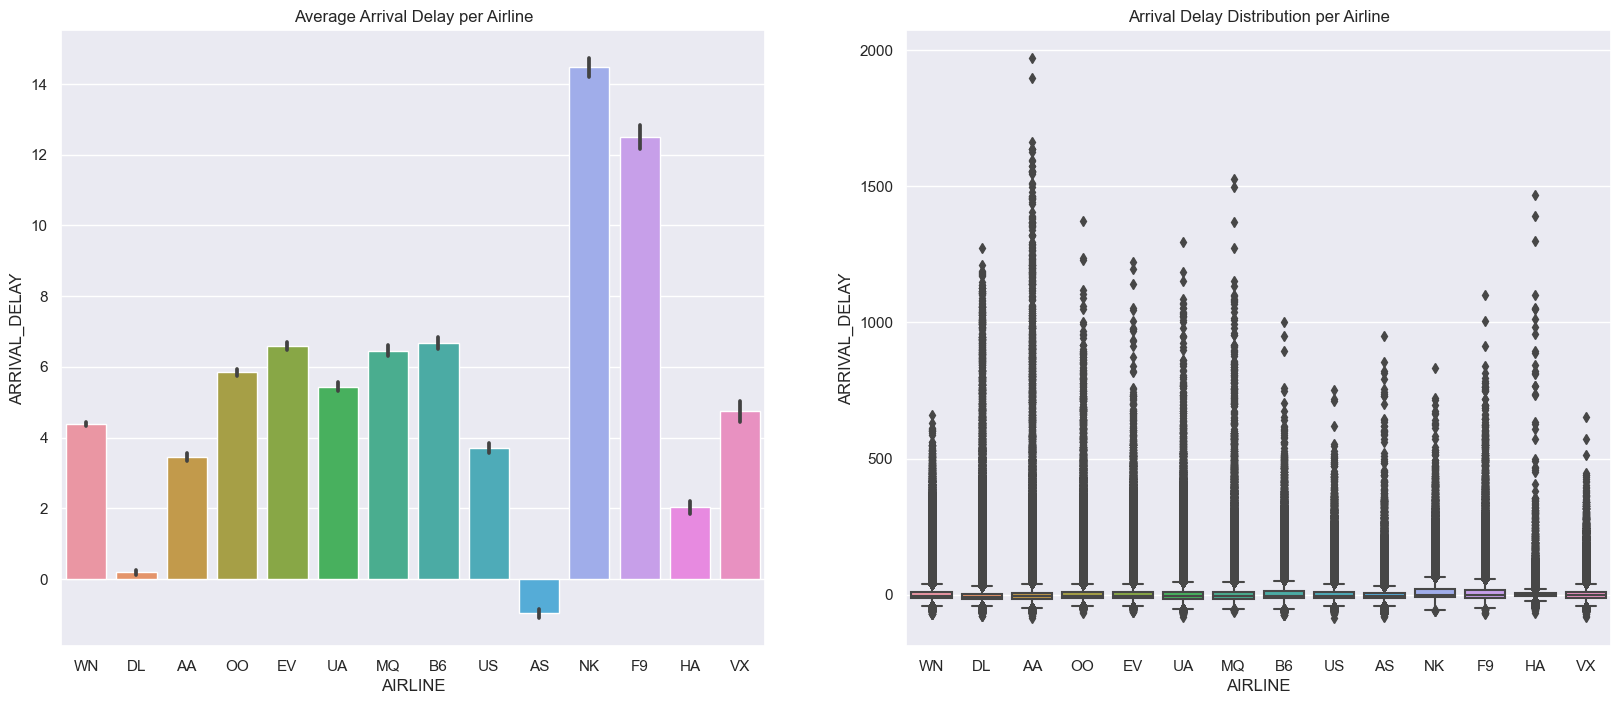

['WN: Southwest Airlines Co.', 'DL: Delta Airlines Inc.', 'AA: American Airlines Inc.', 'OO: Skywest Airlines Inc.', 'EV: Atlantic Southeast Airlines', 'UA: United Airlines Inc.', 'MQ: American Eagle Airlines', 'B6: JetBlue Airways', 'US: US Airways Inc.', 'AS: Alaska Airlines Inc.', 'NK: Spirit Airlines', 'F9: Frontier Airlines Inc.', 'HA: Hawaiian Airlines Inc.', 'VX: Virgin America']


<Figure size 640x480 with 0 Axes>

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=dataset, x = 'AIRLINE', y = 'ARRIVAL_DELAY', order=['WN', 'DL', 'AA', 'OO','EV','UA','MQ','B6',
                                                                                'US','AS', 'NK','F9','HA', 'VX'], ax=ax[0])

ax[0].set_title('Average Arrival Delay per Airline')
sns.boxplot(data=dataset, x = 'AIRLINE', y = 'ARRIVAL_DELAY', order=['WN', 'DL', 'AA', 'OO','EV','UA','MQ','B6',
                                                                                'US','AS', 'NK','F9','HA', 'VX'], ax=ax[1])
ax[1].set_title('Arrival Delay Distribution per Airline')
plt.close(2)
plt.show()
plt.savefig("Average Arrival Delay per Airline ; Arrival Delay Distribution per Airline.png")

print(['WN: Southwest Airlines Co.', 'DL: Delta Airlines Inc.', 'AA: American Airlines Inc.', 'OO: Skywest Airlines Inc.', 
       'EV: Atlantic Southeast Airlines', 'UA: United Airlines Inc.', 'MQ: American Eagle Airlines', 
       'B6: JetBlue Airways', 'US: US Airways Inc.', 'AS: Alaska Airlines Inc.', 'NK: Spirit Airlines', 
       'F9: Frontier Airlines Inc.', 'HA: Hawaiian Airlines Inc.', 'VX: Virgin America'])

In [53]:
df[['AIRLINE','ARRIVAL_DELAY']].groupby('AIRLINE').agg(['count','mean','std'])

ARRIVAL_DELAY         
                count mean std
AIRLINE                       
AA             712935    3  44
AS             171439   -1  29
B6             262042    7  41
DL             870275    0  38
EV             554752    7  41
F9              90090   13  52
HA              76041    2  26
MQ             278791    6  44
NK             115193   14  46
OO             576814    6  39
UA             507762    5  44
US             194223    4  32
VX              61248    5  36
WN            1242403    4  33

In [54]:
df[['AIRLINE','DEPARTURE_DELAY']].groupby('AIRLINE').agg(['count','mean','std'])

DEPARTURE_DELAY         
                  count mean std
AIRLINE                         
AA               715598    9  42
AS               171910    2  26
B6               262843   12  39
DL               872177    7  36
EV               557294    9  39
F9                90290   13  50
HA                76119    0  25
MQ               280282   10  41
NK               115454   16  44
OO               579086    8  38
UA               509534   14  42
US               194825    6  29
VX                61385    9  32
WN              1246129   11  31

Alaska Airlines (AS) shows a negative value of Mean Arrival Delay, arriving earlier than the stipulated Arrival Time. At the same time, Delta Airlines Inc. (DL) has an average Arrival Delay of approximately 0 minutes (On time Arrival). The average Arrival Delay between all the airlines is 5,4 min, which corresponds to a Small Delay taking into account the Delay Categories stablished earlier. Based on the graph's results, no relationship can be drawn between the number of flights from a carrier and the average Arrival Delay. 

In [55]:
df_AirlineDelay = dataset[(dataset.ARRIVAL_DELAY > 15)]

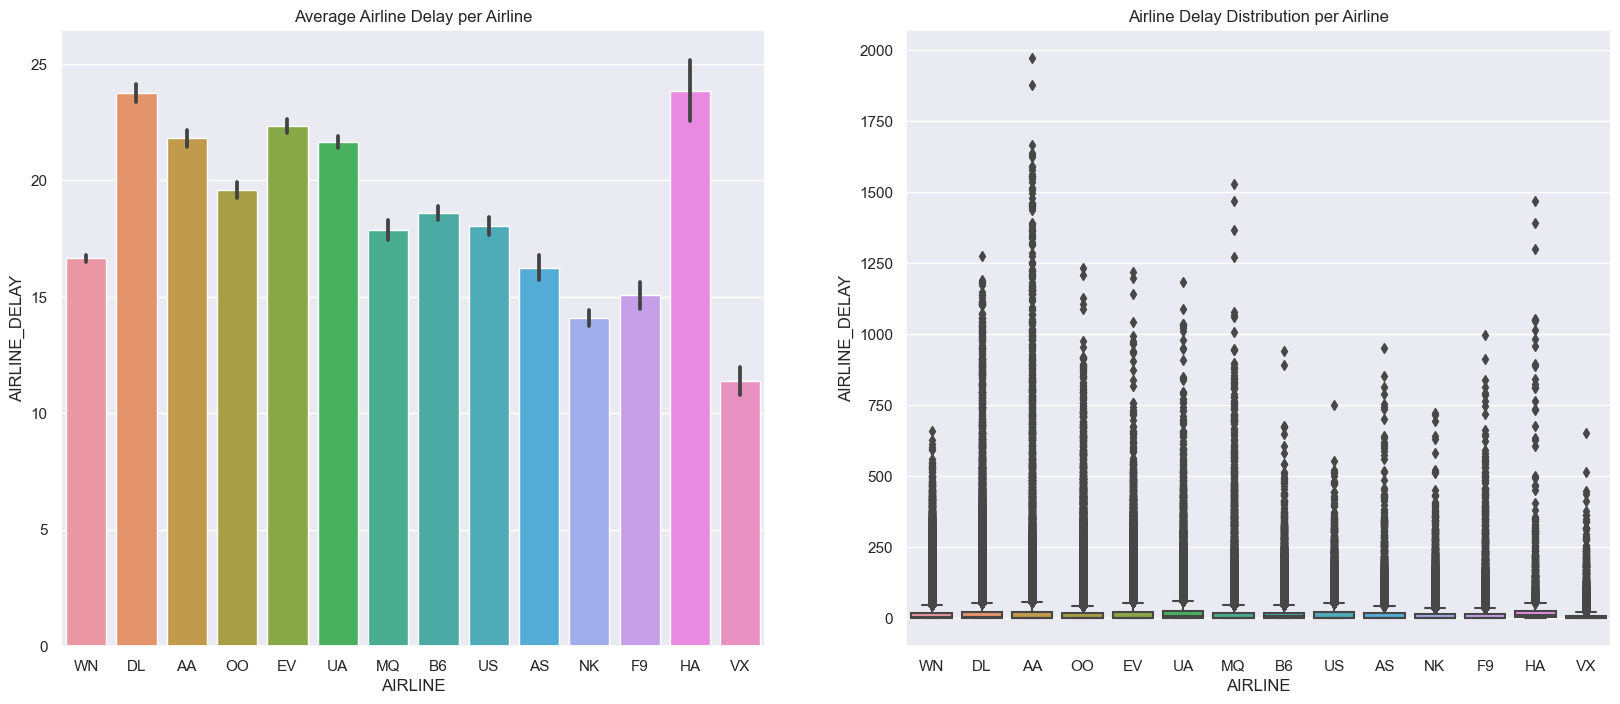

['WN: Southwest Airlines Co.', 'DL: Delta Airlines Inc.', 'AA: American Airlines Inc.', 'OO: Skywest Airlines Inc.', 'EV: Atlantic Southeast Airlines', 'UA: United Airlines Inc.', 'MQ: American Eagle Airlines', 'B6: JetBlue Airways', 'US: US Airways Inc.', 'AS: Alaska Airlines Inc.', 'NK: Spirit Airlines', 'F9: Frontier Airlines Inc.', 'HA: Hawaiian Airlines Inc.', 'VX: Virgin America']


<Figure size 640x480 with 0 Axes>

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=df_AirlineDelay, x = 'AIRLINE', y = 'AIRLINE_DELAY', order=['WN', 'DL', 'AA', 'OO','EV','UA','MQ','B6',
                                                                                'US','AS', 'NK','F9','HA', 'VX'], ax=ax[0])

ax[0].set_title('Average Airline Delay per Airline')
sns.boxplot(data=df_AirlineDelay, x = 'AIRLINE', y = 'AIRLINE_DELAY', order=['WN', 'DL', 'AA', 'OO','EV','UA','MQ','B6',
                                                                                'US','AS', 'NK','F9','HA', 'VX'], ax=ax[1])
ax[1].set_title('Airline Delay Distribution per Airline')
plt.close(2)
plt.show()
plt.savefig("Average Airline Delay per Airline ; Arrival Delay Distribution per Airline.png")

print(['WN: Southwest Airlines Co.', 'DL: Delta Airlines Inc.', 'AA: American Airlines Inc.', 'OO: Skywest Airlines Inc.', 
       'EV: Atlantic Southeast Airlines', 'UA: United Airlines Inc.', 'MQ: American Eagle Airlines', 
       'B6: JetBlue Airways', 'US: US Airways Inc.', 'AS: Alaska Airlines Inc.', 'NK: Spirit Airlines', 
       'F9: Frontier Airlines Inc.', 'HA: Hawaiian Airlines Inc.', 'VX: Virgin America'])

From the top 5 airlines considering 2015's number of national US flights, it is Southwest Airlines Co. (WN) the company that achieves the best results taking into account the mean Airline Delay (approximately 17 minutes (17±6 minutes)). Delta Airlines Inc. (DL) and Hawaiian Airlines Inc. (HA) present the highest average Airline Delay, which is around 24 minutes. The average Arrival Delay from the different carriers is 17±6 minutes, which is a low value. Nevertheless, also Large Delays occur, what is counteracted in the previous result by the great amount of flights that arrive early or on time in the destination airport.

It cannot be stablished any relationship between the volume of flights from an Airline and the average Carrier Delay. Some of the airlines with lower volume of flights in 2015, like Alaska Airlines Inc. (AS), Spirit Airlines (NK), Frontier Airlines Inc. (F9) and Virgin America (VX), present the lower average Airline Delays that can be extracted from the dataset. However, the last but one airline in terms of flights volume, Hawaiian Airlines Inc. (HA) has the highest Carrier Delay mean.

Observing the delay distribution by airline, it can be affirmed that American Airlines Inc. (AA) registered the maximum Airline Delay for 2015. This result goes in line with the hypothesis that high delays can relate with high number of flights. 

In conclusion, the carrier is an important factor when determining delays just like the number of flights. 

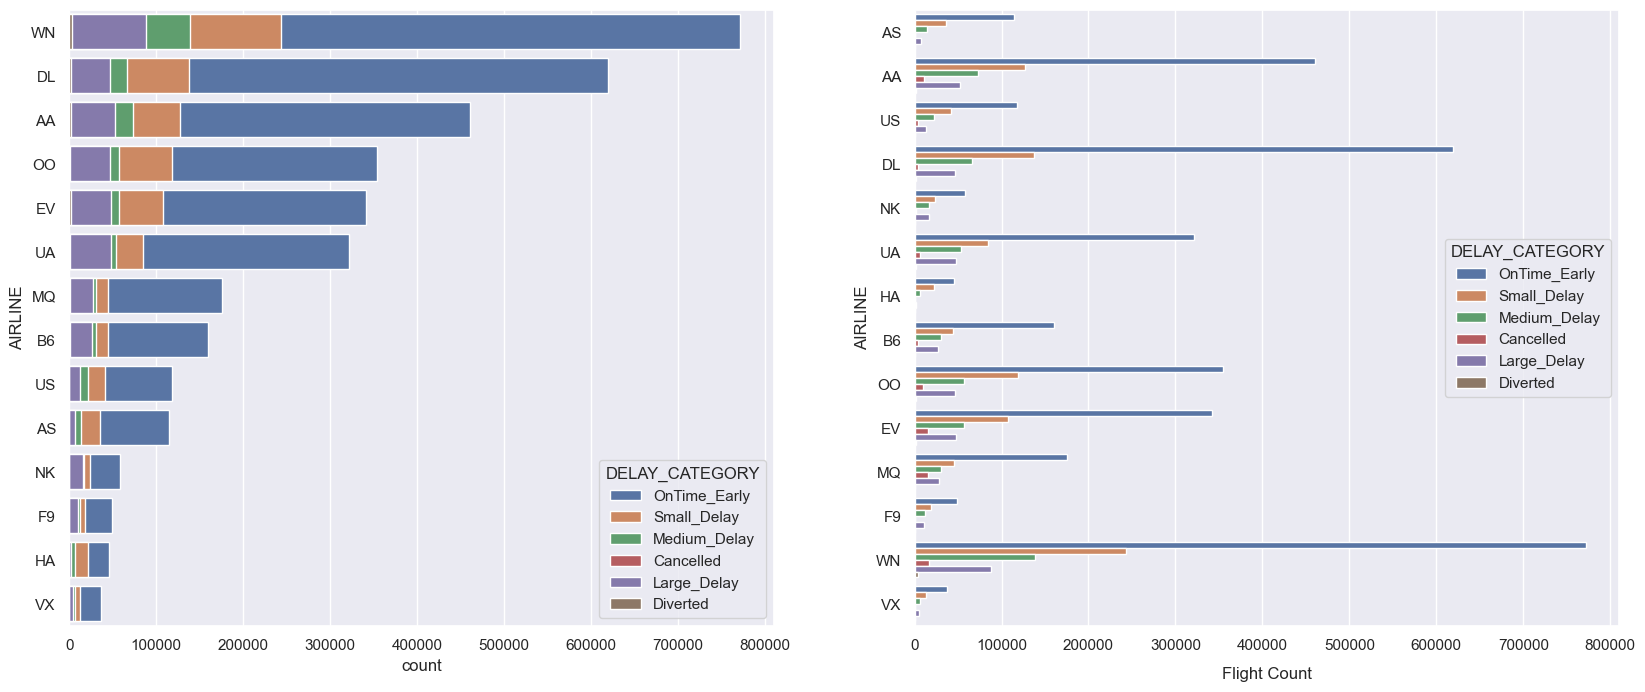

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Airline_Categorization = df['AIRLINE'].value_counts().index.tolist()
sns.countplot(data=df, y='AIRLINE', order=Airline_Categorization, hue='DELAY_CATEGORY', dodge=False, ax=ax[0])

#ax[0].set_title('Types of Delay per Airline')
sns.countplot(y="AIRLINE", hue='DELAY_CATEGORY', data=df, ax=ax[1])
plt.xlabel('Flight Count', fontsize=12, weight = 'normal', labelpad=10)
#ax[1].set_title('Delay Category per Airline')
plt.close(2)
plt.show()

In [58]:
# Types of Delay per Airline
plt.figure(figsize=(14,6))
Airline_Categorization = df['AIRLINE'].value_counts().index.tolist()
sns.countplot(data=df, y='AIRLINE', order=Airline_Categorization, hue='DELAY_CATEGORY', dodge=False).set(title='Types of Delay per Airline')
plt.xlabel("Flight Count")
plt.show()
plt.savefig("Types of Delay per Airline.png")

<Figure size 640x480 with 0 Axes>

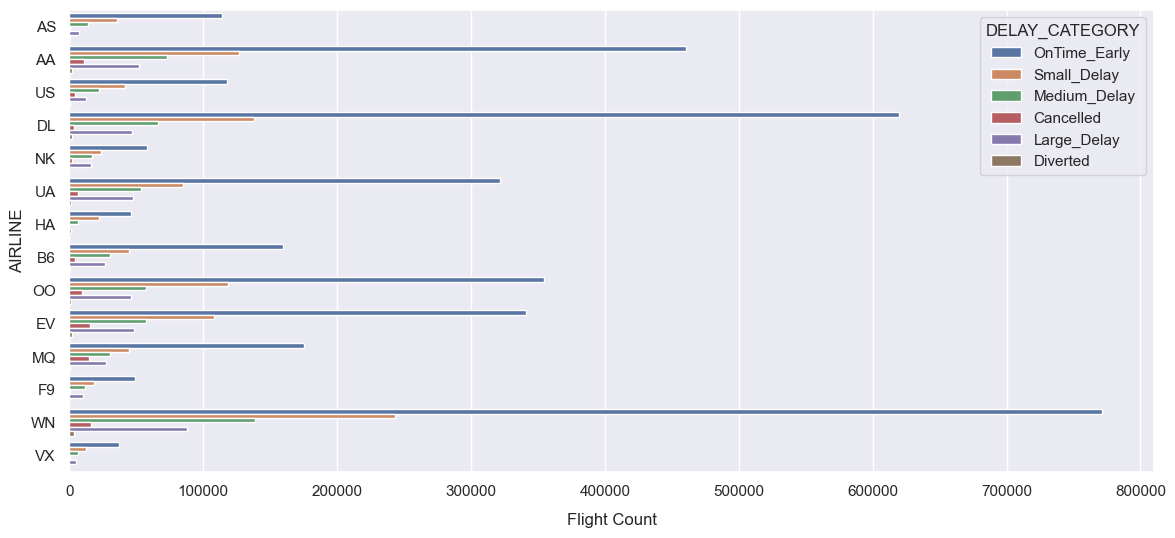

In [59]:
fig = plt.figure(1, figsize=(14,6))
ax = sns.countplot(y="AIRLINE", hue='DELAY_CATEGORY', data=df)
plt.xlabel('Flight Count', fontsize=12, weight = 'normal', labelpad=10)
plt.savefig("Delay Category per Airline.png")

The previous graphs provide a count for each airline of the different flight delay categories. This categories discern wether the flight was On Time or Early (OnTime_Early), delayed up to 15 minutes (Small_Delay), delayed up to 45 minutes (Medium_Delay), delayed more than 45 minutes (Large_Delay), diverted (Diverted) or cancelled (Cancelled).

One conclusion that can be extracted is that independently of the airline, the proportion of large delays (more than 45 minutes) with respect to the total number of flights is very low. Nevertheless, the proportion of the three types of delays (Small_Delay, Medium_Delay and Large_Delay) vary from one airline to another.

In [60]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.5 

fig = plt.figure(1, figsize=(12,6))
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="red", ci=None)
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="red", hatch = '///',
                 alpha = 0.0, ci=None)
plt.xlabel('Mean Delay [min] (Departure Delay: Red - Arrival Delay: Black & White)',
           fontsize=14, weight = 'bold', labelpad=10);
plt.show()
plt.savefig("Mean Departure and Arrival Delay per Airline.png")

On this graph, it can be observed that Arrival Delays are lower than Departure Delays. The explanation behind this statement is the fact that airlines increase the flight speed with the objective of reducing the landing delays with respect to the take off delays. The only exception to this conclusion is Hawaiian Airlines Inc. (HA), as this carrier has more delays at arrival than at departure.

## Origin and Destination Airports

In [61]:
Airlines_Carriers = Carriers.set_index('IATA_CODE')['AIRLINE'].to_dict() #Dictionary

In [62]:
Airports = pd.read_csv('airports.csv') # Airports Datafame
Airports

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA        41        -75  
1                           Abilene    TX     USA        32       -100  
2                       Albuquerque    NM     USA        35       -107  
3                          Aberdeen    SD     USA        45        -98  
4                            Albany    GA     USA        32        -84  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA        56       -132  
318                West Yellowstone    MT     USA        45       -111  
319  Fayetteville/Springdale/Rogers    AR     USA        36        -94  
320                         Yakutat    AK     USA        60       -140  
321                            Yuma    AZ     USA        33       -115  

[322 rows x 7 columns]

In [63]:
Origin_Destination = Airports.set_index('IATA_CODE')['AIRPORT'].to_dict() #Dictionary

There are 322 US Airports that are both Origin and Destination Airports for the national flights contained in this dataset for the year 2015.

In [64]:
Origin = dataset.ORIGIN_AIRPORT.value_counts()
Destination = dataset.DESTINATION_AIRPORT.value_counts()

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.barplot(x=Origin.index[:20], y=Origin.values[:20])
plt.title('Number of Take-Offs per Airport')
plt.xlabel('IATA Airport Code', fontsize=14)
plt.ylabel('Volume of Take-Offs')

plt.subplot(122)
sns.barplot(x=Destination.index[:20], y=Destination.values[:20])
plt.title('Number of Landings per Airport')
plt.xlabel('IATA Airport Code', fontsize=14)
plt.ylabel('Volume of Landings')

plt.tight_layout()
plt.show()
plt.savefig("Number of Take-Offs and Landings per Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

<Figure size 640x480 with 0 Axes>

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


As it can be deduced from the previous graphs, the number of Take-Offs and the number of Landings are balanced for each of the airports taken into account (Origin and Departure Airports, respectively). Due to the high number of airports contained in the data set, the origin and destination airports are filtered and only the 20 airports with a greater number of flights are considered.

In [65]:
# As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume. 
Origin_Airports = dataset[(dataset.ORIGIN_AIRPORT == 'ATL') | (dataset.ORIGIN_AIRPORT == 'ORD') |
                               (dataset.ORIGIN_AIRPORT == 'DFW') | (dataset.ORIGIN_AIRPORT == 'DEN') |
                               (dataset.ORIGIN_AIRPORT == 'LAX') | (dataset.ORIGIN_AIRPORT == 'SFO') | 
                               (dataset.ORIGIN_AIRPORT == 'PHX') | (dataset.ORIGIN_AIRPORT == 'IAH') |
                               (dataset.ORIGIN_AIRPORT == 'LAS') | (dataset.ORIGIN_AIRPORT == 'MSP') | 
                               (dataset.ORIGIN_AIRPORT == 'MCO') | (dataset.ORIGIN_AIRPORT == 'SEA') |
                               (dataset.ORIGIN_AIRPORT == 'DTW') | (dataset.ORIGIN_AIRPORT == 'BOS') | 
                               (dataset.ORIGIN_AIRPORT == 'EWR') | (dataset.ORIGIN_AIRPORT == 'CLT') |
                               (dataset.ORIGIN_AIRPORT == 'LGA') | (dataset.ORIGIN_AIRPORT == 'SLC') | 
                               (dataset.ORIGIN_AIRPORT == 'JFK') | (dataset.ORIGIN_AIRPORT == 'BWI') |
                               (dataset.ORIGIN_AIRPORT == 'MDW') | (dataset.ORIGIN_AIRPORT == 'DCA') |
                               (dataset.ORIGIN_AIRPORT == 'FLL') | (dataset.ORIGIN_AIRPORT == 'SAN') |
                                                    (dataset.ORIGIN_AIRPORT == 'MIA')]

Destination_Airports = dataset[(dataset.DESTINATION_AIRPORT == 'ATL') | (dataset.DESTINATION_AIRPORT == 'ORD') |
                               (dataset.DESTINATION_AIRPORT == 'DFW') | (dataset.DESTINATION_AIRPORT == 'DEN') |
                               (dataset.DESTINATION_AIRPORT == 'LAX') | (dataset.DESTINATION_AIRPORT == 'SFO') | 
                               (dataset.DESTINATION_AIRPORT == 'PHX') | (dataset.DESTINATION_AIRPORT == 'IAH') |
                               (dataset.DESTINATION_AIRPORT == 'LAS') | (dataset.DESTINATION_AIRPORT == 'MSP') | 
                               (dataset.DESTINATION_AIRPORT == 'MCO') | (dataset.DESTINATION_AIRPORT == 'SEA') |
                               (dataset.DESTINATION_AIRPORT == 'DTW') | (dataset.DESTINATION_AIRPORT == 'BOS') | 
                               (dataset.DESTINATION_AIRPORT == 'EWR') | (dataset.DESTINATION_AIRPORT == 'CLT') |
                               (dataset.DESTINATION_AIRPORT == 'LGA') | (dataset.DESTINATION_AIRPORT == 'SLC') | 
                               (dataset.DESTINATION_AIRPORT == 'JFK') | (dataset.DESTINATION_AIRPORT == 'BWI') |
                               (dataset.DESTINATION_AIRPORT == 'MDW') | (dataset.DESTINATION_AIRPORT == 'DCA') |
                               (dataset.DESTINATION_AIRPORT == 'FLL') | (dataset.DESTINATION_AIRPORT == 'SAN') |
                                                    (dataset.DESTINATION_AIRPORT == 'MIA')]

In [66]:
f,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(data=Origin_Airports, x = 'ORIGIN_AIRPORT', y = 'TAXI_OUT', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[0])
ax[0].set_title('Average Departure Taxi per Origin Airport')
sns.barplot(data=Destination_Airports, x = 'DESTINATION_AIRPORT', y = 'TAXI_IN', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[1])
ax[1].set_title('Average Arrival Taxi per Destination Airport')
#plt.close(2)
plt.show()
plt.savefig("Average Departure Taxi per Origin Airport & Average Arrival Taxi per Destination Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

<Figure size 640x480 with 0 Axes>

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


The graphs show that the average Departure Taxi time for all the airports is much higher than the mean Arrival Taxi for the same airports. For example, Atlanta Airport (ATL) registers a mean Departure Taxi of 17,5 minutes and an average Arrival Taxi of 9 minutes. Another sample could be New York (JFK), with a mean Departure Taxi of 28 minutes (the largest of all the considered airports) and an average Arrival Taxi of 9 minutes. The smallest recorded Average Arrival Taxi  corresponds to Minneapolis airport (MSP).

## Air System Delays

In [67]:
print(dataset['ORIGIN_AIRPORT'].value_counts()[:20])

ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
MCO    110982
SEA    110899
DTW    108500
BOS    107847
EWR    101772
CLT    100324
LGA     99605
SLC     97210
JFK     93811
BWI     86079
Name: ORIGIN_AIRPORT, dtype: int64


Hartsfield-Jackson Atlanta International Airport (ATL) is the biggest airport in terms of incoming and outgoing flights in 2015, with nearly 350,000 flights.

In [68]:
# As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume. 
Airports = dataset[(dataset.ORIGIN_AIRPORT == 'ATL') | (dataset.ORIGIN_AIRPORT == 'ORD') |
                               (dataset.ORIGIN_AIRPORT == 'DFW') | (dataset.ORIGIN_AIRPORT == 'DEN') |
                               (dataset.ORIGIN_AIRPORT == 'LAX') | (dataset.ORIGIN_AIRPORT == 'SFO') | 
                               (dataset.ORIGIN_AIRPORT == 'PHX') | (dataset.ORIGIN_AIRPORT == 'IAH') |
                               (dataset.ORIGIN_AIRPORT == 'LAS') | (dataset.ORIGIN_AIRPORT == 'MSP') | 
                               (dataset.ORIGIN_AIRPORT == 'MCO') | (dataset.ORIGIN_AIRPORT == 'SEA') |
                               (dataset.ORIGIN_AIRPORT == 'DTW') | (dataset.ORIGIN_AIRPORT == 'BOS') | 
                               (dataset.ORIGIN_AIRPORT == 'EWR') | (dataset.ORIGIN_AIRPORT == 'CLT') |
                               (dataset.ORIGIN_AIRPORT == 'LGA') | (dataset.ORIGIN_AIRPORT == 'SLC') | 
                               (dataset.ORIGIN_AIRPORT == 'JFK') | (dataset.ORIGIN_AIRPORT == 'BWI') |
                               (dataset.ORIGIN_AIRPORT == 'MDW') | (dataset.ORIGIN_AIRPORT == 'DCA') |
                               (dataset.ORIGIN_AIRPORT == 'FLL') | (dataset.ORIGIN_AIRPORT == 'SAN') |
                                                    (dataset.ORIGIN_AIRPORT == 'MIA')]

In [69]:
f,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(data=Airports, x = 'ORIGIN_AIRPORT', y = 'ARRIVAL_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[0])
ax[0].set_title('Average Arrival Delay per Origin Airport')
sns.boxplot(data=Airports, x = 'ORIGIN_AIRPORT', y = 'ARRIVAL_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[1])
ax[1].set_title('Arrival Delay Distribution per Origin Airport')
#plt.close(2)
plt.show()
plt.savefig("Average Arrival Delay per Origin Airport & Arrival Delay Distribution per Origin Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

<Figure size 640x480 with 0 Axes>

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume.

Based on the graph's results, no relationship can be drawn between the number of flights from an origin airport and the average Arrival Delay. Taking into account the flight's volume, some departure airports with the biggest number of flights have low mean Arrival Delays (Atlanta (ATL)), whilst other airports with less flight's volumen have higher average Arrival Delays (Baltimore-Washington (BWI)). On the contrary, Chicago Airport (ORD), which is the second Departure Airport in terms number of flights, presents the higher mean Arrival Delay. Also, Salt Lake City Airport (SLC), the 18th airport considering flight's volumen, has the lower average Arrival Delay. Therefore, no conclusion can be extracted of the association between volume of flights from the Departure Airport and the delays.

In [70]:
# As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume. 
Destination_Airports = dataset[(dataset.DESTINATION_AIRPORT == 'ATL') | (dataset.DESTINATION_AIRPORT == 'ORD') |
                               (dataset.DESTINATION_AIRPORT == 'DFW') | (dataset.DESTINATION_AIRPORT == 'DEN') |
                               (dataset.DESTINATION_AIRPORT == 'LAX') | (dataset.DESTINATION_AIRPORT == 'SFO') | 
                               (dataset.DESTINATION_AIRPORT == 'PHX') | (dataset.DESTINATION_AIRPORT == 'IAH') |
                               (dataset.DESTINATION_AIRPORT == 'LAS') | (dataset.DESTINATION_AIRPORT == 'MSP') | 
                               (dataset.DESTINATION_AIRPORT == 'MCO') | (dataset.DESTINATION_AIRPORT == 'SEA') |
                               (dataset.DESTINATION_AIRPORT == 'DTW') | (dataset.DESTINATION_AIRPORT == 'BOS') | 
                               (dataset.DESTINATION_AIRPORT == 'EWR') | (dataset.DESTINATION_AIRPORT == 'CLT') |
                               (dataset.DESTINATION_AIRPORT == 'LGA') | (dataset.DESTINATION_AIRPORT == 'SLC') | 
                               (dataset.DESTINATION_AIRPORT == 'JFK') | (dataset.DESTINATION_AIRPORT == 'BWI') |
                               (dataset.DESTINATION_AIRPORT == 'MDW') | (dataset.DESTINATION_AIRPORT == 'DCA') |
                               (dataset.DESTINATION_AIRPORT == 'FLL') | (dataset.DESTINATION_AIRPORT == 'SAN') |
                                                    (dataset.DESTINATION_AIRPORT == 'MIA')]

<Figure size 640x480 with 0 Axes>

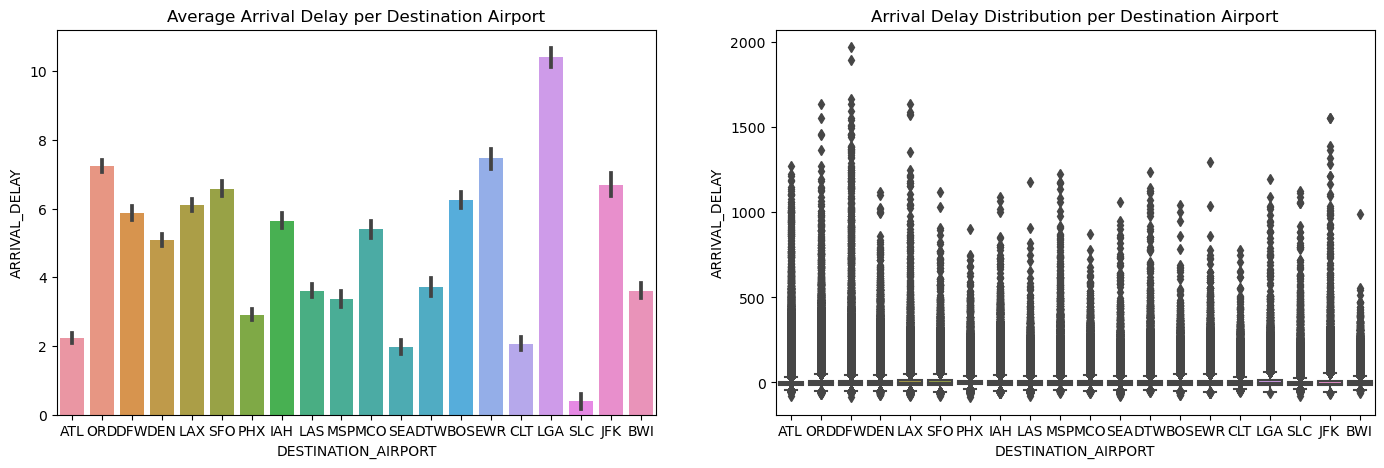

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


In [71]:
f,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(data=Destination_Airports, x = 'DESTINATION_AIRPORT', y = 'ARRIVAL_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[0])
ax[0].set_title('Average Arrival Delay per Destination Airport')
sns.boxplot(data=Destination_Airports, x = 'DESTINATION_AIRPORT', y = 'ARRIVAL_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[1])
ax[1].set_title('Arrival Delay Distribution per Destination Airport')
#plt.close(2)
plt.show()
plt.savefig("Average Arrival Delay per Destination Airport & Arrival Delay Distribution per Destination Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

In [72]:
df_AirSystemDelay = dataset[(dataset.ARRIVAL_DELAY > 15)]

In [73]:
# As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume. 
Airports = df_AirSystemDelay[(df_AirSystemDelay.ORIGIN_AIRPORT == 'ATL') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'ORD') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'DFW') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'DEN') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'LAX') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'SFO') | 
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'PHX') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'IAH') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'LAS') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'MSP') | 
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'MCO') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'SEA') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'DTW') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'BOS') | 
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'EWR') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'CLT') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'LGA') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'SLC') | 
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'JFK') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'BWI') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'MDW') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'DCA') |
                               (df_AirSystemDelay.ORIGIN_AIRPORT == 'FLL') | (df_AirSystemDelay.ORIGIN_AIRPORT == 'SAN') |
                                                    (df_AirSystemDelay.ORIGIN_AIRPORT == 'MIA')]

<Figure size 640x480 with 0 Axes>

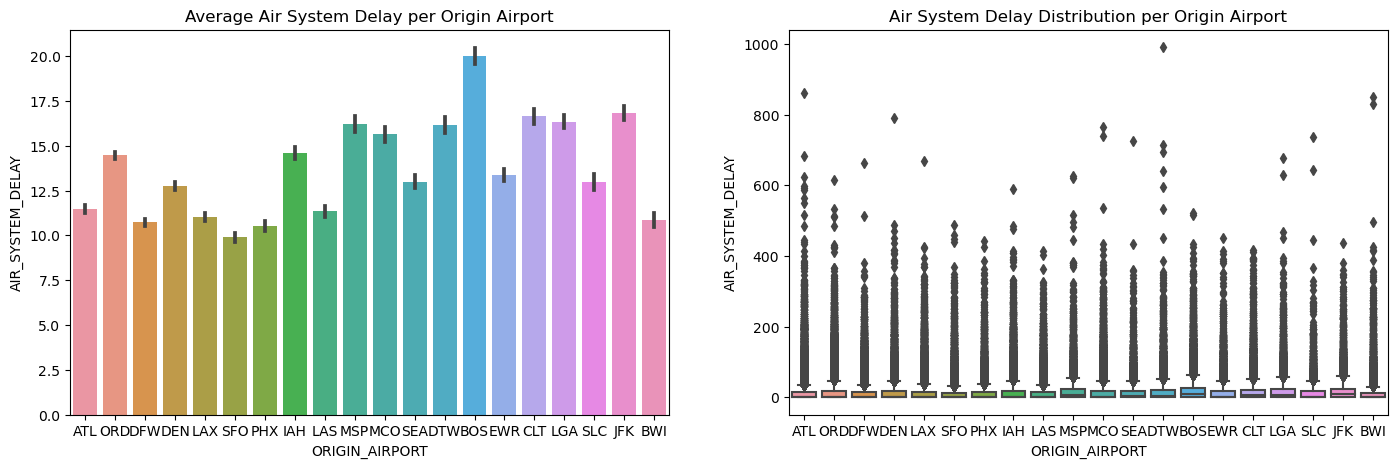

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


In [74]:
f,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(data=Airports, x = 'ORIGIN_AIRPORT', y = 'AIR_SYSTEM_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[0])
ax[0].set_title('Average Air System Delay per Origin Airport')
sns.boxplot(data=Airports, x = 'ORIGIN_AIRPORT', y = 'AIR_SYSTEM_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[1])
ax[1].set_title('Air System Delay Distribution per Origin Airport')
#plt.close(2)
plt.show()
plt.savefig("Average Air System Delay per Origin Airport & Air System Delay Distribution per Origin Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume.

A hypothesis can be stablished, as, in general, the National Airspace System (NAS) delays are slightly lower for the airports with a highest volume of flights. There are exceptions like Chicago (ORD) and Houston (IAH), where the Air System average delay is a bit higher than the nearest airport in terms of number of national flights. Airports with a lower volume of domestic flights, often have higher NAS delays. There are inconsistencies for this theory, as Baltimore-Washington (BWI) has one of the lower average Air System delays.

However, this hypothesis doesn't take into account international flights because the dataset is limited to US domestic flights. Some of the US's top international airports, that can absolutelly disrupt the conclusions extracted from this dataset are: New York (JFK),  Los Angeles (LAX), Newark (EWR) Houston (IAH), Chicago (ORD), Dallas Fortworth (DFW) or Atlanta (ATL).


It can be concluded that there is a high variability in mean Arrival Delays, both between the different airports and between the different airlines as well. Some Airlines have higher delay ratios even though the frequency of flights is less than other companies. This means that, in order to achieve a better delay model accuracy, the model must be specific to the carrier and the Departure Airport, as the location may be an important factor on delay prediction.

In [75]:
# As there are too many airports on the feature set, the focus will be placed on the 20 airports with more flight's volume. 
Destination_Airports = dataset[(dataset.DESTINATION_AIRPORT == 'ATL') | (dataset.DESTINATION_AIRPORT == 'ORD') |
                               (dataset.DESTINATION_AIRPORT == 'DFW') | (dataset.DESTINATION_AIRPORT == 'DEN') |
                               (dataset.DESTINATION_AIRPORT == 'LAX') | (dataset.DESTINATION_AIRPORT == 'SFO') | 
                               (dataset.DESTINATION_AIRPORT == 'PHX') | (dataset.DESTINATION_AIRPORT == 'IAH') |
                               (dataset.DESTINATION_AIRPORT == 'LAS') | (dataset.DESTINATION_AIRPORT == 'MSP') | 
                               (dataset.DESTINATION_AIRPORT == 'MCO') | (dataset.DESTINATION_AIRPORT == 'SEA') |
                               (dataset.DESTINATION_AIRPORT == 'DTW') | (dataset.DESTINATION_AIRPORT == 'BOS') | 
                               (dataset.DESTINATION_AIRPORT == 'EWR') | (dataset.DESTINATION_AIRPORT == 'CLT') |
                               (dataset.DESTINATION_AIRPORT == 'LGA') | (dataset.DESTINATION_AIRPORT == 'SLC') | 
                               (dataset.DESTINATION_AIRPORT == 'JFK') | (dataset.DESTINATION_AIRPORT == 'BWI') |
                               (dataset.DESTINATION_AIRPORT == 'MDW') | (dataset.DESTINATION_AIRPORT == 'DCA') |
                               (dataset.DESTINATION_AIRPORT == 'FLL') | (dataset.DESTINATION_AIRPORT == 'SAN') |
                                                    (dataset.DESTINATION_AIRPORT == 'MIA')]

In [76]:
f,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(data=Destination_Airports, x = 'DESTINATION_AIRPORT', y = 'AIR_SYSTEM_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[0])
ax[0].set_title('Average Air System Delay per Destination Airport')
sns.boxplot(data=Destination_Airports, x = 'DESTINATION_AIRPORT', y = 'AIR_SYSTEM_DELAY', order=['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS', 'MSP', 
                                                                'MCO', 'SEA', 'DTW', 'BOS', 'EWR', 'CLT', 'LGA', 'SLC', 'JFK', 'BWI'], ax=ax[1])
ax[1].set_title('Air System Delay Distribution per Destination Airport')
#plt.close(2)
plt.show()
plt.savefig("Average Air System Delay per Destination Airport & Air System Delay Distribution per Destination Airport.png")

print(['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 
       'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 
    'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington'])

<Figure size 640x480 with 0 Axes>

['ATL: Atlanta', 'ORD: Chicago', 'DFW: Dallas Fortworth', 'DEN: Denver', 'LAX: Los Angeles', 'SFO: San Francisco', 'PHX: Phoenix', 'IAH: Houston', 'LAS: Las Vegas', 'MSP: Minneapolis', 'MCO: Orlando', 'SEA: Seattle–Tacoma', 'DTW: Detroit', 'BOS: Boston', 'EWR: Newark', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'SLC: Salt Lake City', 'JFK: New York', 'BWI: Baltimore-Washington']


## Day of the Week and Months of the Year

In [77]:
dataset[['DAY_OF_WEEK','ARRIVAL_DELAY']].groupby('DAY_OF_WEEK').agg(['mean','count'])

ARRIVAL_DELAY        
                     mean   count
DAY_OF_WEEK                      
1                       6  841794
2                       4  827399
3                       4  843242
4                       6  857886
5                       5  851387
6                       2  689745
7                       4  802555

The different days of the week are compared taking into account the average Arrival Delay. Most flights are concentrated in daily days, between Mondays and Fridays. Weekend days (Saturday and Sunday) have a lower number of total flights per day.

Average Arrival Delay is also slightly higher for the week days that have a greater number of flights. This can be specially seen on Saturdays, the week day with the lower number of flights, which also has by far the lower Average Arrival Delay of all the days (2 minutes). This circumstance proofs the hypothesis that as the frequency of flights increase, Arrival delays also increase.

Next, the average Arrival Delays based on the months of the year (2015) are studied:

In [78]:
Month_Delays = dataset[['MONTH','ARRIVAL_DELAY']].groupby('MONTH').agg(['mean','count'])
Month_Delays.columns = ['mean','count']
Month_Delays

mean   count
MONTH              
1         6  457013
2         8  407663
3         5  492138
4         3  479251
5         4  489641
6        10  492847
7         6  514384
8         5  503956
9        -1  462153
10       -1  482878
11        1  462367
12        6  469717

In [79]:
import plotly.express as px
fig = px.bar(Month_Delays, x=Month_Delays.index, y='mean', color='count', height=400, labels={
                     "mean": "Average Arrival Delay (min)",
                     "MONTH": "Months (2015)",
                     "count": "Number of Flights"}, title="Month Average Arrival Delays in 2015")
fig.show()
plt.savefig("Month Average Arrival Delays in 2015.png")

The height of the bar represents the Average Arrival Delay for the different months of the year. The different colors of the bars indicate the number of flights for each monthy considering the scale for the number of flight operations. There is clear a clear tendency that shows the increment in flights during the Spring and Summer seasons, while there is a volume reduction during Fall and Winter.

The height of the bar shows the delay ratio. No sequence can be stablished between the number of flights per month and the registered delays for those months.

In [92]:
# Creating and naming a new variable
dataset['DEPARTURE_DATE'] = pd.to_datetime(dataset.YEAR*10000+dataset.MONTH*100+dataset.DAY,format='%Y%m%d')

In [107]:
Calendar_Flights_Volume = dataset.groupby('DEPARTURE_DATE')['ARRIVAL_DELAY'].count()
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Volume of Flights by Calendar (2015)')
calmap.yearplot(Calendar_Flights_Volume, year=2015, monthly_border=True, cmap='YlGn')
plt.show()

In [93]:
Delays_Volume = dataset[(dataset.ARRIVAL_DELAY > 15)]

In [108]:
Calendar_Delays = Delays_Volume.groupby('DEPARTURE_DATE')['ARRIVAL_DELAY'].count()
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Volume of Delayed Flights by Calendar (2015)')
calmap.yearplot(Calendar_Delays, year=2015, monthly_border=True, cmap='YlGn')
plt.show()
#plt.savefig("Volume of Delayed Flights by Calendar (2015).png")

In [ ]:
dataset['DELAYED_BINARY'] = None
df.loc[df['ARRIVAL_DELAY'] <= 0, 'DELAY_CATEGORY'] = 'OnTime_Early'
df.loc[(df['ARRIVAL_DELAY'] > 0) & (df['ARRIVAL_DELAY'] <= 15), 'DELAY_CATEGORY'] = 'Small_Delay'
df.loc[(df['ARRIVAL_DELAY'] > 15) & (df['ARRIVAL_DELAY'] <= 45), 'DELAY_CATEGORY'] = 'Medium_Delay'
df.loc[df['ARRIVAL_DELAY'] > 45, 'DELAY_CATEGORY'] = 'Large_Delay'
df.loc[df['DIVERTED'] == 1, 'DELAY_CATEGORY'] = 'Diverted'
df.loc[df['CANCELLED'] == 1, 'DELAY_CATEGORY'] = 'Cancelled'

In [ ]:
Month_Delays = dataset[['MONTH','ARRIVAL_DELAY']].groupby('MONTH').agg(['mean','count'])
Month_Delays.columns = ['mean','count']
Month_Delays

In [ ]:
import plotly.express as px
fig = px.bar(Month_Delays, x=Month_Delays.index, y='mean', color='count', height=400, labels={
                     "mean": "Average Arrival Delay (min)",
                     "MONTH": "Months (2015)",
                     "count": "Number of Flights"}, title="Month Average Arrival Delays in 2015")
fig.show()
plt.savefig("Month Average Arrival Delays in 2015.png")

In [105]:
DayHour_Delays = dataset[['SCHEDULED_DEPARTURE','ARRIVAL_DELAY']].groupby('SCHEDULED_DEPARTURE').agg(['mean','count'])
DayHour_Delays.columns = ['mean','count']
DayHour_Delays

mean  count
SCHEDULED_DEPARTURE             
1                      40     12
2                      22     11
3                      35     93
4                      18      5
5                       2    693
...                   ...    ...
2355                   -0   3710
2356                    4    305
2357                   10    322
2358                   11    260
2359                    6   6022

[1321 rows x 2 columns]

In [96]:
import plotly.express as px
fig = px.line(DayHour_Delays, x=DayHour_Delays.index, y='mean', height=400, labels={
                     "mean": "Average Arrival Delay (min)",
                     "SCHEDULED_DEPARTURE": "Departure Time",
                     "count": "Number of Flights"}, title="Average Arrival Delays vs Departure Time")
fig.show()
plt.savefig("Average Arrival Delays vs Departure Time.png")

In [97]:
import plotly.express as px
fig = px.line(DayHour_Delays, x=DayHour_Delays.index, y='count', height=400, labels={
                     "SCHEDULED_DEPARTURE": "Departure Time",
                     "count": "Number of Flights"}, title="Number of Flights vs Departure Time")
fig.show()
plt.savefig("Number of Flights vs Departure Time.png")

The day-night difference and the fact of the airport activity reduction during the night, suggests that Scheduled Departure (Departure Time) is an important variable in the creation of models for flight delays. From 21:00 to 6:00, the number of flights decreases dramatically comparing with day hours, even going so far as to not having any flights at certain morning hours.

Considering the mean Arrival Delay, it increases with the Departure hour as the day goes on. Starting the day (5:00 - 6:00 in the morning), flights depart on time and the delay increases constantly until the end of the day. The graph shows that the average Arrival Delay stablishes a maximum value at around 21:00 and then, it decreases its value along with the reduction in the number of passengers. This tendency is common if considering different origin airports or airlines, as the frequency of flights increase, the delays grow.